## Irish Tourism exploratory Data Analysis

## Datasets Used 
Irish Tourism exploratory Data Analysis used tourism data for Irish residents retrieved from https://data.cso.ie/table/HTQ01.

tourism data on overseas trips by non residents retrieved from https://data.cso.ie/table/TMQ20.

and used flight arrival data retrieved from https://data.smartdublin.ie/dataset/dublin-economic-monitor/resource/f6297d1e-2d25-4a35-a499-164f24511dd7?inner_span=True . 


This Jupiter Notebook is broken down in sections. Each section has a brief explanation of the process it undergoes as well as the rationale for the strategies used.
The comments in the code are used to understand the researchers logic and method of choice. 
Descriptive statistics and data profiling were performed to give the researcher an idea of the structure and the basic statistics of the dataset.

Once the structure was determined, each dataset was cleaned and modified using various dataset modification techiniques. The goal of the dataset manipulation was to preare the datasets for the merging step where they are merged into one new dataset using the common "Datetime" column.

After merging the dataset, the researcher performed EDA on the merged dataset. They also use graphs to show the trends and relationships of the columns. The merged dataset was saved to CSV file called "final_df.csv" which was used in the Machine Learning.


In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import shapiro, norm, kstest, probplot, poisson ,binom, kurtosis
import warnings
warnings.filterwarnings('ignore')


## EDA on the first dataset

### Descriptive Statistics and Data Profiling


In [ ]:
def load_df(filename): #read in the data 
    ''' Thsi function reads in the dataset, if the file does not exist or is empty an exception is raised'''
    try:
    #read in the data 
        df1 = pd.read_csv(filename) 
        print("Data read successfully")
        df1.head()
    except FileNotFoundError:
        print(f"file not found: {filename} ")
    except pd.errors.EmptyDataError:
        print(f"Error: the {filename} is empty")
    return df1

In [ ]:
#Reading in the first datset 
df1 =load_df("TMQ20.20241028T131000.csv")

Data read successfully


,Area of Residence,Reason for Journey,Quarter,Statistic Label,UNIT,VALUE
0,All Countries,All reasons for journey,2012Q1,Average Length of Stay by Overseas Travellers ...,Nights,6.8
1,All Countries,All reasons for journey,2012Q1,Expenditure by Overseas Travellers in Ireland ...,Euro Million,483.0
2,All Countries,All reasons for journey,2012Q1,"Overseas Trips to Ireland by Non-Residents, wi...",%,100.0
3,All Countries,All reasons for journey,2012Q2,Average Length of Stay by Overseas Travellers ...,Nights,7.0
4,All Countries,All reasons for journey,2012Q2,Expenditure by Overseas Travellers in Ireland ...,Euro Million,816.0
...,...,...,...,...,...,...
91,All Countries,All reasons for journey,2019Q3,Expenditure by Overseas Travellers in Ireland ...,Euro Million,1824.0
92,All Countries,All reasons for journey,2019Q3,"Overseas Trips to Ireland by Non-Residents, wi...",%,100.0
93,All Countries,All reasons for journey,2019Q4,Average Length of Stay by Overseas Travellers ...,Nights,6.2
94,All Countries,All reasons for journey,2019Q4,Expenditure by Overseas Travellers in Ireland ...,Euro Million,1001.0


In [628]:
df1.shape

(96, 6)

In [629]:
df1.describe()

,VALUE
count,96.000000
mean,385.997917
std,527.581793
min,6.000000
25%,7.175000
50%,100.000000
75%,697.500000
max,1832.000000


In [630]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area of Residence   96 non-null     object 
 1   Reason for Journey  96 non-null     object 
 2   Quarter             96 non-null     object 
 3   Statistic Label     96 non-null     object 
 4   UNIT                96 non-null     object 
 5   VALUE               96 non-null     float64
dtypes: float64(1), object(5)
memory usage: 4.6+ KB


## A lot of the columns are object class

In [631]:
df1.head()

,Area of Residence,Reason for Journey,Quarter,Statistic Label,UNIT,VALUE
0,All Countries,All reasons for journey,2012Q1,Average Length of Stay by Overseas Travellers ...,Nights,6.8
1,All Countries,All reasons for journey,2012Q1,Expenditure by Overseas Travellers in Ireland ...,Euro Million,483.0
2,All Countries,All reasons for journey,2012Q1,"Overseas Trips to Ireland by Non-Residents, wi...",%,100.0
3,All Countries,All reasons for journey,2012Q2,Average Length of Stay by Overseas Travellers ...,Nights,7.0
4,All Countries,All reasons for journey,2012Q2,Expenditure by Overseas Travellers in Ireland ...,Euro Million,816.0


In [632]:
#Checking for missing vlaues 
df1.isna().sum()

Area of Residence     0
Reason for Journey    0
Quarter               0
Statistic Label       0
UNIT                  0
VALUE                 0
dtype: int64

The code pivots the DataFrame to ensure unique rows for each combination of Area of Residence, Reason for Journey, and Quarter, with UNIT values as separate columns. It then resets the multi-level index to create a flat DataFrame, removes the index column name to avoid indexing issues, and renames columns for consistency, including Area_of_Residence, Reason_for_Journey, Euro_Million, and Euro_Nights

In [633]:
# Ensure there are no duplicates for the given combination of index columns
df1 = df1.pivot(
    index=['Area of Residence', 'Reason for Journey', 'Quarter'],
    columns='UNIT',
    values='VALUE'
).reset_index()

# Remove any multi-level indexing
df1.columns.name = None
df1 = df1.rename(columns ={"Area of Residence":"Area_of_Residence","Reason for Journey":"Reason_for_Journey","Euro Million":"Euro_Million","Nights": "Euro_Nights"})

In [634]:
df1.head()

,Area_of_Residence,Reason_for_Journey,Quarter,%,Euro_Million,Euro_Nights
0,All Countries,All reasons for journey,2012Q1,100.0,483.0,6.8
1,All Countries,All reasons for journey,2012Q2,100.0,816.0,7.0
2,All Countries,All reasons for journey,2012Q3,100.0,994.0,8.1
3,All Countries,All reasons for journey,2012Q4,100.0,622.0,7.2
4,All Countries,All reasons for journey,2013Q1,100.0,541.0,6.7


Cleaning up the dataset for merging with future datasets on the datetime dtype  

In [635]:
# Define a mapping from quarter to the start month
quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}

# Replace 'Q1', 'Q2', etc. with corresponding months
df1['Quarter'] = df1['Quarter'].replace(quarter_to_month, regex=True)

# Convert the 'Quarter' column to datetime
df1['Quarter'] = pd.to_datetime(df1['Quarter'], format='%Y%m')
df1.drop(columns = ["%","Area_of_Residence"],inplace = True )
df1.head()

,Reason_for_Journey,Quarter,Euro_Million,Euro_Nights
0,All reasons for journey,2012-01-01,483.0,6.8
1,All reasons for journey,2012-04-01,816.0,7.0
2,All reasons for journey,2012-07-01,994.0,8.1
3,All reasons for journey,2012-10-01,622.0,7.2
4,All reasons for journey,2013-01-01,541.0,6.7


In [636]:
# df1 is clean with no null values 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Reason_for_Journey  32 non-null     object        
 1   Quarter             32 non-null     datetime64[ns]
 2   Euro_Million        32 non-null     float64       
 3   Euro_Nights         32 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ KB


## EDA on the Irish residents datasets

Descriptive Statistics and Data Profiling


In [ ]:
#loading the dataset 
try: 
    df2 = pd.read_csv('HTQ01.20241029T091043.csv')
    df2.shape
except FileNotFoundError as e:
    print("Error")
    print("Exception details", e)


In [638]:
df2.head()

,Statistic Label,Quarter,Domestic,Reason for Journey,UNIT,VALUE
0,Average Length of Stay by Irish Residents,2012Q1,Domestic,All reasons for journey,Nights per Trip,2.1
1,Average Length of Stay by Irish Residents,2012Q2,Domestic,All reasons for journey,Nights per Trip,2.7
2,Average Length of Stay by Irish Residents,2012Q3,Domestic,All reasons for journey,Nights per Trip,3.7
3,Average Length of Stay by Irish Residents,2012Q4,Domestic,All reasons for journey,Nights per Trip,2.4
4,Average Length of Stay by Irish Residents,2013Q1,Domestic,All reasons for journey,Nights per Trip,2.2


In [639]:
df2.columns

Index(['Statistic Label', 'Quarter', 'Domestic', 'Reason for Journey', 'UNIT',
       'VALUE'],
      dtype='object')

In [640]:
# Once again, we can see that there are a lot of dtype object columns 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statistic Label     64 non-null     object 
 1   Quarter             64 non-null     object 
 2   Domestic            64 non-null     object 
 3   Reason for Journey  64 non-null     object 
 4   UNIT                64 non-null     object 
 5   VALUE               64 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.1+ KB


In [641]:
df2.describe()

,VALUE
count,64.000000
mean,224.979688
std,252.099839
min,2.000000
25%,2.400000
50%,121.650000
75%,394.500000
max,824.900000


## Data Cleaning and Manipulation
The researcher first checked for null values to see if there was a need to handle missing values. Since there were no null values, the data was then pivoted to improve readability. Specifically, the data was restructured by setting Quarter as the index and UNIT values as columns, allowing for a clear view of each variable over different quarters. Finally, the pivot table was displayed to verify the structure and content.

In [642]:
#Checking for null values 
df2.isna().sum()

Statistic Label       0
Quarter               0
Domestic              0
Reason for Journey    0
UNIT                  0
VALUE                 0
dtype: int64

In [643]:
# Pivot the data to make it more readable 
df2 = df2.pivot(
    index='Quarter', 
    values='VALUE', 
    columns='UNIT', 
).reset_index()

# Display the pivot table
df2.head()

UNIT,Quarter,Euro Million,Nights per Trip
0,2012Q1,243.8,2.1
1,2012Q2,352.2,2.7
2,2012Q3,632.1,3.7
3,2012Q4,286.1,2.4
4,2013Q1,239.5,2.2


Cleaning up the dataset for merging with future datasets on the datetime dtype  

In [644]:
# Define a mapping from quarter to the start month
quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}

# Replace 'Q1', 'Q2', etc. with corresponding months
df2['Quarter'] = df2['Quarter'].replace(quarter_to_month, regex=True)

# Convert the 'Quarter' column to datetime
df2['Quarter'] = pd.to_datetime(df2['Quarter'], format='%Y%m')

In [645]:
df2 = df2.rename(columns =  {"Euro Million": "Irish_Million","Nights per Trip":"Irish_Nights_per_Trip"})
df2.head()

UNIT,Quarter,Irish_Million,Irish_Nights_per_Trip
0,2012-01-01,243.8,2.1
1,2012-04-01,352.2,2.7
2,2012-07-01,632.1,3.7
3,2012-10-01,286.1,2.4
4,2013-01-01,239.5,2.2


In [646]:
df2.describe()

UNIT,Irish_Million,Irish_Nights_per_Trip
count,32.000000,32.000000
mean,447.346875,2.612500
std,164.541670,0.603083
min,239.500000,2.000000
25%,335.850000,2.200000
50%,395.400000,2.400000
75%,534.300000,2.825000
max,824.900000,3.800000


In [647]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Quarter                32 non-null     datetime64[ns]
 1   Irish_Million          32 non-null     float64       
 2   Irish_Nights_per_Trip  32 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 896.0 bytes


## EDA on the Irish flights arrival dataset

Descriptive Statistics and Data Profiling

In [648]:
#reading in the dataset
try: 
    df3= pd.read_csv('indicator-9-dublin-airport.csv',nrows = 32)
    df3.shape
except FileNotFoundError as e:
    print("Error")
    print("Exception details", e)

In [649]:
df3.shape

(32, 9)

In [650]:
df3.head()

,Quarter,Dublin Airport\nTotal Pax Seasonally Adjusted by CSO,Total (m),% YoY,%QoQ,YoY,% Average YoY,Changes in \nprevious four quarters,Sum of\nprevious four quarters
0,Q1 12,4728263,"4,728",NaN,NaN,NaN,NaN,NaN,NaN
1,Q2 12,4696597,"4,697",NaN,NaN,NaN,NaN,NaN,NaN
2,Q3 12,4824062,"4,824",NaN,NaN,NaN,NaN,NaN,NaN
3,Q4 12,4801202,"4,801",NaN,NaN,NaN,NaN,NaN,NaN
4,Q1 13,4848521,"4,849",2.54%,NaN,120.258,NaN,NaN,NaN


In [651]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Quarter                                              32 non-null     object 
 1   Dublin Airport
Total Pax Seasonally Adjusted by CSO  32 non-null     int64  
 2   Total (m)                                            32 non-null     object 
 3   % YoY                                                28 non-null     object 
 4   %QoQ                                                 21 non-null     object 
 5   YoY                                                  28 non-null     float64
 6   % Average YoY                                        25 non-null     object 
 7   Changes in 
previous four quarters                   25 non-null     object 
 8   Sum of
previous four quarters                        25 non-null     obje

In [652]:
df3.describe()

,Dublin Airport\nTotal Pax Seasonally Adjusted by CSO,YoY
count,3.200000e+01,28.000000
mean,6.465558e+06,485.741893
std,1.245170e+06,226.820476
min,4.696597e+06,99.141000
25%,5.168152e+06,332.596000
50%,6.616777e+06,460.225500
75%,7.436682e+06,705.826750
max,8.225980e+06,856.397000


## Dataset Manipulation 

Once again, a lot of the columns are Dtype object, they will need to be converted to a numerical Dtype, drop irrelevant columns and create the merging column.

In [653]:
#Step 1: seperate the Quarter column into 2 seperate columns 
df3[['Quarter_Only', 'Year']] = df3['Quarter'].str.split(' ', expand=True)
# Step 2: Define the mapping from quarters to months
quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}

# Step 2: Map each quarter to its corresponding month
df3['Month'] = df3['Quarter_Only'].map(quarter_to_month)

# Step 3: Concatenate 'Year' and 'Month' to form 'YYYY-MM' format and convert to datetime
df3['Date'] = pd.to_datetime('20' + df3['Year'] + '-' + df3['Month'] + '-01')

# Optional: Drop intermediate columns if desired (e.g., Quarter_Only and Month)
df3 = df3.drop(columns=['Quarter_Only', 'Year', 'Month','Quarter'])
df3.set_index("Date",inplace=True)
df3.head()

,Dublin Airport\nTotal Pax Seasonally Adjusted by CSO,Total (m),% YoY,%QoQ,YoY,% Average YoY,Changes in \nprevious four quarters,Sum of\nprevious four quarters
Date,,,,,,,,
2012-01-01,4728263,"4,728",NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,4696597,"4,697",NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01,4824062,"4,824",NaN,NaN,NaN,NaN,NaN,NaN
2012-10-01,4801202,"4,801",NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,4848521,"4,849",2.54%,NaN,120.258,NaN,NaN,NaN


In [654]:
df3.columns

Index(['Dublin Airport\nTotal Pax Seasonally Adjusted by CSO', 'Total (m)',
       '% YoY', '%QoQ', 'YoY', '% Average YoY',
       'Changes in \nprevious four quarters ',
       'Sum of\nprevious four quarters '],
      dtype='object')

In [655]:
#Dropping irrelevant columns 
df3.drop(columns=['% Average YoY',"Changes in \nprevious four quarters ","Sum of\nprevious four quarters "], inplace=True)

df3.rename(columns  ={'Dublin Airport\nTotal Pax Seasonally Adjusted by CSO':'Dublin_Total_flight','Total (m)':'Total_(m)_flight','% YoY':'%_YoY_flight',
                      '%QoQ':'%_QoQ_flight','YoY':'YoY_flight'},inplace = True )

In [656]:
df3.head()

,Dublin_Total_flight,Total_(m)_flight,%_YoY_flight,%_QoQ_flight,YoY_flight
Date,,,,,
2012-01-01,4728263,"4,728",NaN,NaN,NaN
2012-04-01,4696597,"4,697",NaN,NaN,NaN
2012-07-01,4824062,"4,824",NaN,NaN,NaN
2012-10-01,4801202,"4,801",NaN,NaN,NaN
2013-01-01,4848521,"4,849",2.54%,NaN,120.258


In [657]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2012-01-01 to 2019-10-01
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dublin_Total_flight  32 non-null     int64  
 1   Total_(m)_flight     32 non-null     object 
 2   %_YoY_flight         28 non-null     object 
 3   %_QoQ_flight         21 non-null     object 
 4   YoY_flight           28 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ KB


In [658]:
#Cleaning up the dataframe and converting columns to appropriate Dtype
df3['Total_(m)_flight'] = df3['Total_(m)_flight'].str.replace(',', '').astype(int)
df3['%_YoY_flight'] = df3['%_YoY_flight'].str.replace('%', '').astype(float)
df3['%_QoQ_flight'] = df3['%_QoQ_flight'].str.replace('%', '').astype(float)

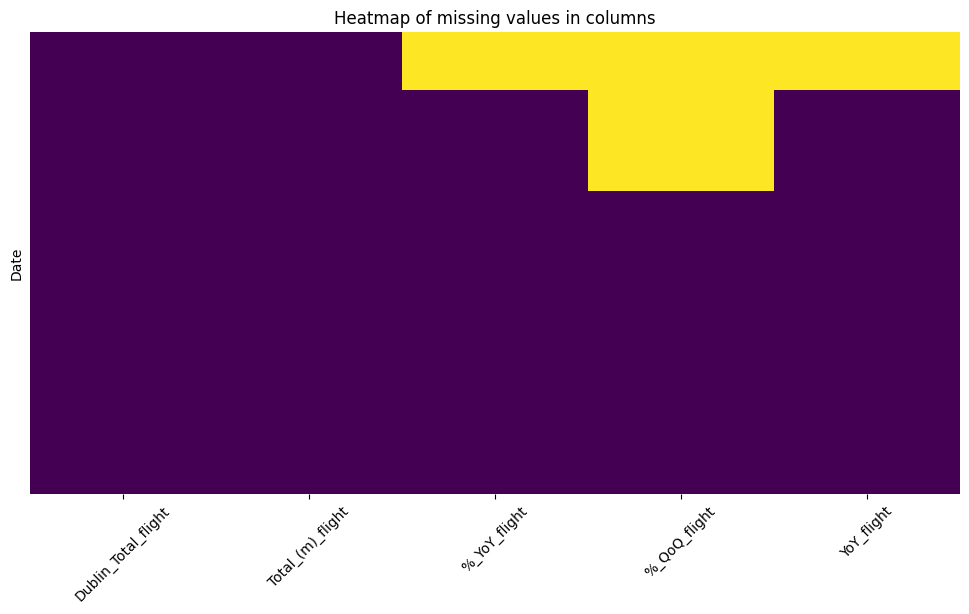

In [659]:
#Display missing vlaues in the data through a heatmap 
plt.figure(figsize = (12,6))
sns.heatmap(df3.isna(),yticklabels=False,cmap ="viridis" , cbar = False)
plt.title("Heatmap of missing values in columns")
plt.xticks(rotation=45)
plt.show()

## Imputation Strategy for Missing Values

%_YoY_flight: This metric, being year-over-year, depends on past data. Missing values were backward-filled (bfill) to ensure continuity without introducing arbitrary values, maintaining data consistency over time.

%_QoQ_flight: The quarter-over-quarter percentage change was calculated for Total_(m)_flight. Initial missing values were replaced with 0, indicating no change when previous data was unavailable, keeping QoQ trends intact.

YoY_flight: Like %_YoY_flight, this yearly value was backward-filled to maintain trend continuity across time periods.

In [660]:
# Calculate %_YoY missing values, as this is a yearly value depending on the previous years data, it can be quite hard to impute 
df3['%_YoY_flight'].fillna(method='bfill', inplace=True)

# Calculate QoQ percentage change
df3['%_QoQ_flight'] = df3['Total_(m)_flight'].pct_change(periods=1) * 100  # periods=1 for quarter-to-quarter
# Replace NaN values in the %_QoQ column with 0 (if desired)
df3['%_QoQ_flight'].fillna(0, inplace=True)

# CalculateForward Fill, as this is a yearly value depending on the previous years data, it can be quite hard to impute 
df3['YoY_flight'].fillna(method='bfill', inplace=True)

In [661]:
df3.head()

,Dublin_Total_flight,Total_(m)_flight,%_YoY_flight,%_QoQ_flight,YoY_flight
Date,,,,,
2012-01-01,4728263,4728,2.54,0.000000,120.258
2012-04-01,4696597,4697,2.54,-0.655668,120.258
2012-07-01,4824062,4824,2.54,2.703854,120.258
2012-10-01,4801202,4801,2.54,-0.476783,120.258
2013-01-01,4848521,4849,2.54,0.999792,120.258


## Merging the data together and conducting EDA on the merged dataset 

In [662]:
df = pd.merge(df1,df2 ,how = 'outer', on = "Quarter")
df = pd.merge(df,df3, how = "outer", left_on = "Quarter", right_on = "Date")
df.rename(columns={"Quarter":"Date"},inplace = True)
df.drop(columns = "Reason_for_Journey", inplace = True)
df['Total_Expenditure'] = df['Euro_Million'] + df['Irish_Million']
#df.to_csv('final_df.csv', index=False)  # Save the DataFrame to a CSV file

In [663]:
df.head()

,Date,Euro_Million,Euro_Nights,Irish_Million,Irish_Nights_per_Trip,Dublin_Total_flight,Total_(m)_flight,%_YoY_flight,%_QoQ_flight,YoY_flight,Total_Expenditure
0,2012-01-01,483.0,6.8,243.8,2.1,4728263,4728,2.54,0.000000,120.258,726.8
1,2012-04-01,816.0,7.0,352.2,2.7,4696597,4697,2.54,-0.655668,120.258,1168.2
2,2012-07-01,994.0,8.1,632.1,3.7,4824062,4824,2.54,2.703854,120.258,1626.1
3,2012-10-01,622.0,7.2,286.1,2.4,4801202,4801,2.54,-0.476783,120.258,908.1
4,2013-01-01,541.0,6.7,239.5,2.2,4848521,4849,2.54,0.999792,120.258,780.5


In [664]:
df.shape

(32, 11)

In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   32 non-null     datetime64[ns]
 1   Euro_Million           32 non-null     float64       
 2   Euro_Nights            32 non-null     float64       
 3   Irish_Million          32 non-null     float64       
 4   Irish_Nights_per_Trip  32 non-null     float64       
 5   Dublin_Total_flight    32 non-null     int64         
 6   Total_(m)_flight       32 non-null     int32         
 7   %_YoY_flight           32 non-null     float64       
 8   %_QoQ_flight           32 non-null     float64       
 9   YoY_flight             32 non-null     float64       
 10  Total_Expenditure      32 non-null     float64       
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 2.9 KB


In [666]:
df.describe()

,Euro_Million,Euro_Nights,Irish_Million,Irish_Nights_per_Trip,Dublin_Total_flight,Total_(m)_flight,%_YoY_flight,%_QoQ_flight,YoY_flight,Total_Expenditure
count,32.000000,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1051.093750,6.900000,447.346875,2.612500,6.465558e+06,6465.656250,7.381562,1.709516,440.056406,1498.440625
std,404.448279,0.599462,164.541670,0.603083,1.245170e+06,1245.177163,4.194679,1.973771,244.725516,554.432224
min,483.000000,6.000000,239.500000,2.000000,4.696597e+06,4697.000000,1.240000,-1.701921,99.141000,726.800000
25%,706.500000,6.500000,335.850000,2.200000,5.168152e+06,5168.250000,3.970000,0.129734,275.434750,1072.225000
50%,997.500000,6.750000,395.400000,2.400000,6.616777e+06,6617.000000,6.705000,1.752632,382.089500,1427.600000
75%,1329.250000,7.125000,534.300000,2.825000,7.436682e+06,7436.500000,9.835000,2.704771,653.538000,1890.625000
max,1832.000000,8.200000,824.900000,3.800000,8.225980e+06,8226.000000,15.630000,7.735849,856.397000,2648.900000


## Distribution Analysis of Dataset Columns

Columns Euro_Million, Euro_Nights, Total_(m)_flight, %_QoQ_flight, and Total_Expenditure demonstrate the closest alignment with normality, while Irish_Million, Irish_Nights_per_Trip, and YoY_flight show slight skew. Further validation using visual methods such as Q-Q plots and histograms will be implemented.

The researcher checked if the data on each columns were normally distributed using distribution plot. most of the columns appear normally distributed, the mean and the median are similar in each column 

-- Several graphs were also used to check the trends and the correlation each columns.

-- Distribution plot to determine the distribution of the data in each column

-- Line graphs to see the trends of the ependiture  over a specific time period

-- Heatmap for checking the correlation of each column in a graphical format

In [667]:
#Displaying the kurtosis of each column 
kurtosis_values = df.kurt()
print(kurtosis_values)

Euro_Million            -0.839363
Euro_Nights             -0.167680
Irish_Million           -0.527081
Irish_Nights_per_Trip   -0.385242
Dublin_Total_flight     -1.534251
Total_(m)_flight        -1.534286
%_YoY_flight            -0.677515
%_QoQ_flight             1.472190
YoY_flight              -1.213651
Total_Expenditure       -0.699000
dtype: float64


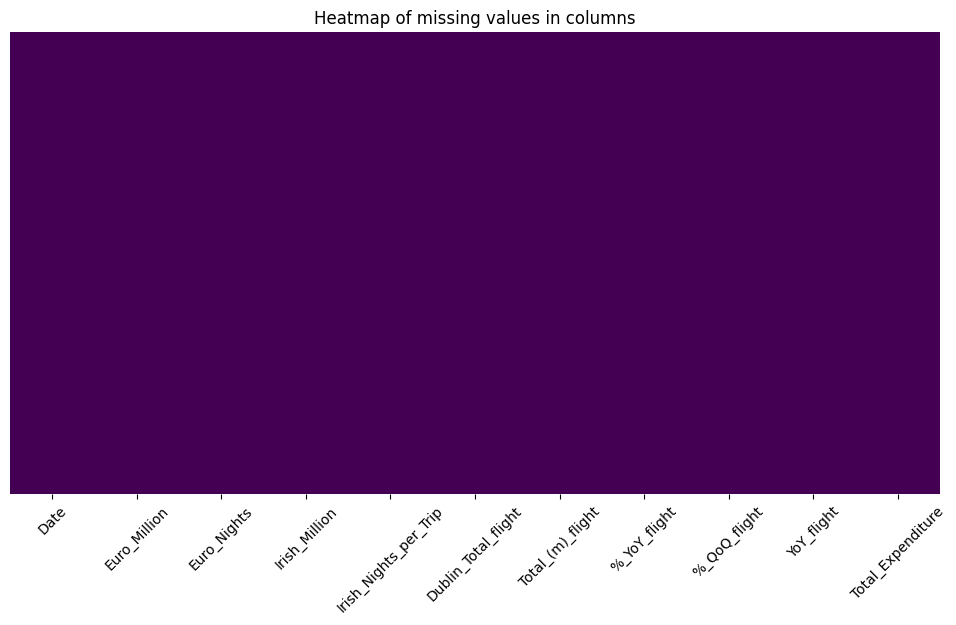

In [668]:
#Display missing vlaues in the data through a heatmap 
plt.figure(figsize = (12,6))
sns.heatmap(df.isna(),yticklabels=False,cmap ="viridis" , cbar = False)
plt.title("Heatmap of missing values in columns")
plt.xticks(rotation=45)
plt.show()

<Axes: >

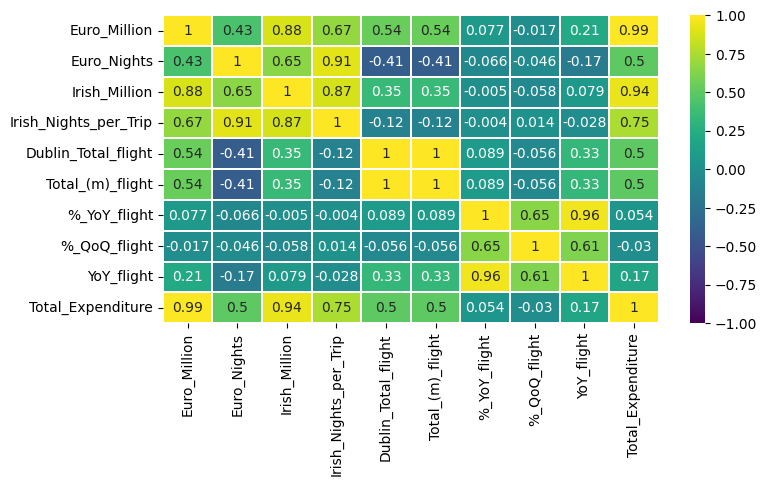

In [669]:
# Correlation heatmap of numerical figures in the accident dataset.
plt.figure(figsize=(8,4))
sns.heatmap(df.select_dtypes(include = (np.number)).corr().round(3),linewidths=.01,vmin=-1,vmax=1,annot=True,cmap="viridis")

In [670]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       Euro_Million  Euro_Nights  Irish_Million  \
Euro_Million               1.000000     0.426238       0.877124   
Euro_Nights                0.426238     1.000000       0.648890   
Irish_Million              0.877124     0.648890       1.000000   
Irish_Nights_per_Trip      0.672675     0.908337       0.869459   
Dublin_Total_flight        0.543175    -0.414084       0.349255   
Total_(m)_flight           0.543174    -0.414092       0.349260   
%_YoY_flight               0.076611    -0.065567      -0.005318   
%_QoQ_flight              -0.017440    -0.045773      -0.058395   
YoY_flight                 0.206590    -0.167387       0.079051   
Total_Expenditure          0.989790     0.503507       0.936621   

                       Irish_Nights_per_Trip  Dublin_Total_flight  \
Euro_Million                        0.672675             0.543175   
Euro_Nights                         0.908337            -0.414084   
Irish_Million                      

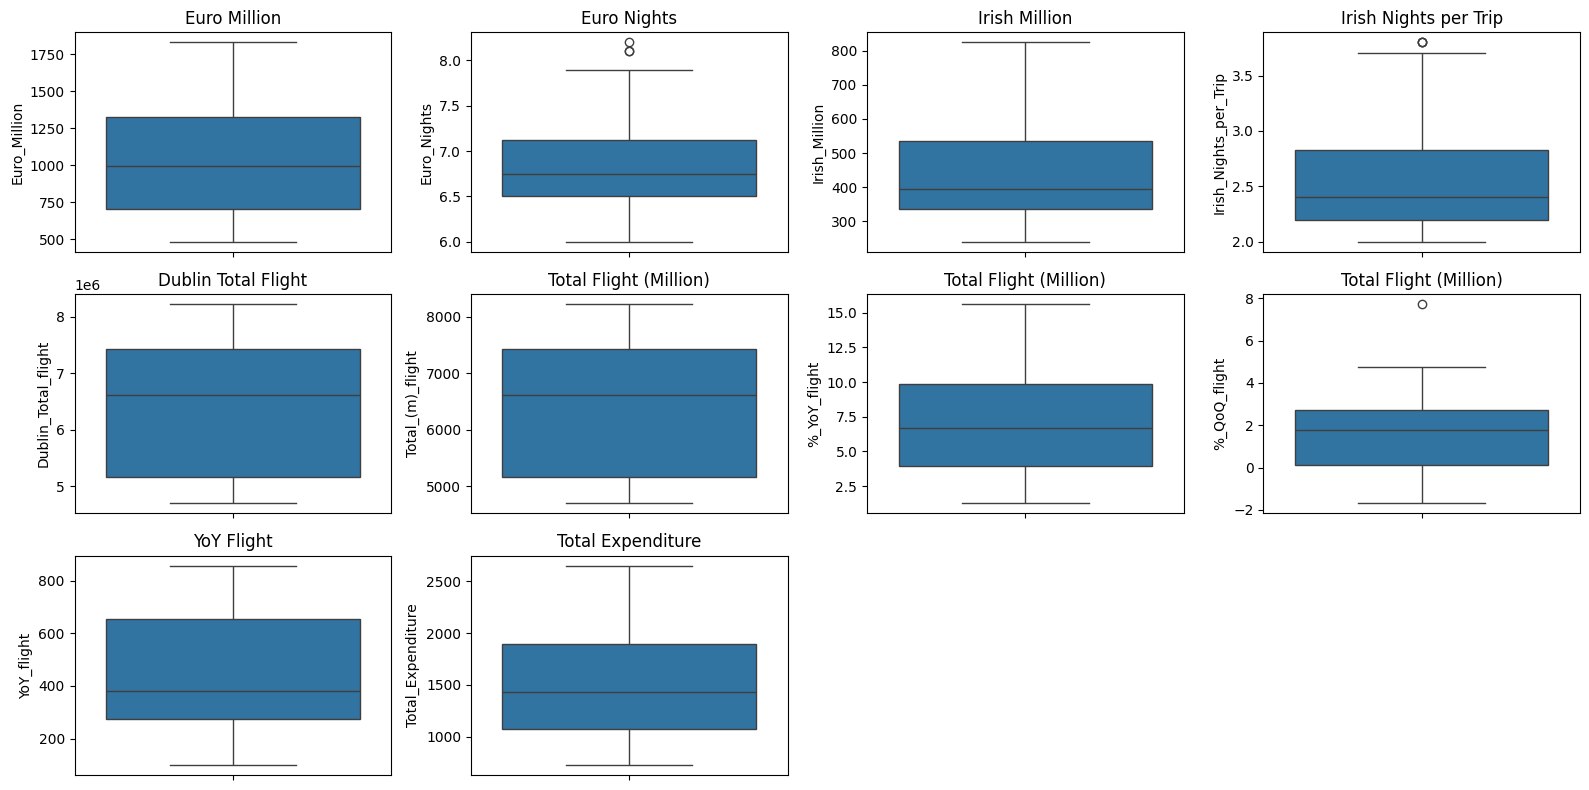

In [671]:
# Create a figure and axes with three rows and four columns
fig, axes = plt.subplots(3, 4, figsize=(16, 8))

# Plot boxplots for the df
sns.boxplot(df['Euro_Million'], ax=axes[0, 0])
axes[0, 0].set_title('Euro Million')

sns.boxplot(df['Euro_Nights'], ax=axes[0, 1])
axes[0, 1].set_title('Euro Nights')

sns.boxplot(df['Irish_Million'], ax=axes[0, 2])
axes[0, 2].set_title('Irish Million')

sns.boxplot(df['Irish_Nights_per_Trip'], ax=axes[0, 3])
axes[0, 3].set_title('Irish Nights per Trip')

# Plot histograms for the second row
sns.boxplot(df['Dublin_Total_flight'], ax=axes[1, 0])
axes[1, 0].set_title('Dublin Total Flight')

sns.boxplot(df['Total_(m)_flight'], ax=axes[1, 1])
axes[1, 1].set_title('Total Flight (Million)')

sns.boxplot(df['%_YoY_flight'], ax=axes[1, 2])
axes[1, 2].set_title('Total Flight (Million)')#

sns.boxplot(df['%_QoQ_flight'], ax=axes[1, 3])
axes[1, 3].set_title('Total Flight (Million)')

sns.boxplot(df['YoY_flight'], ax=axes[2,0])
axes[2,0].set_title('YoY Flight')

sns.boxplot(df['Total_Expenditure'], ax=axes[2,1], )
axes[2, 1].set_title('Total Expenditure')


# Hide the empty subplots in the third row (bottom-right corner)
axes[2, 2].axis('off')
axes[2, 3].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

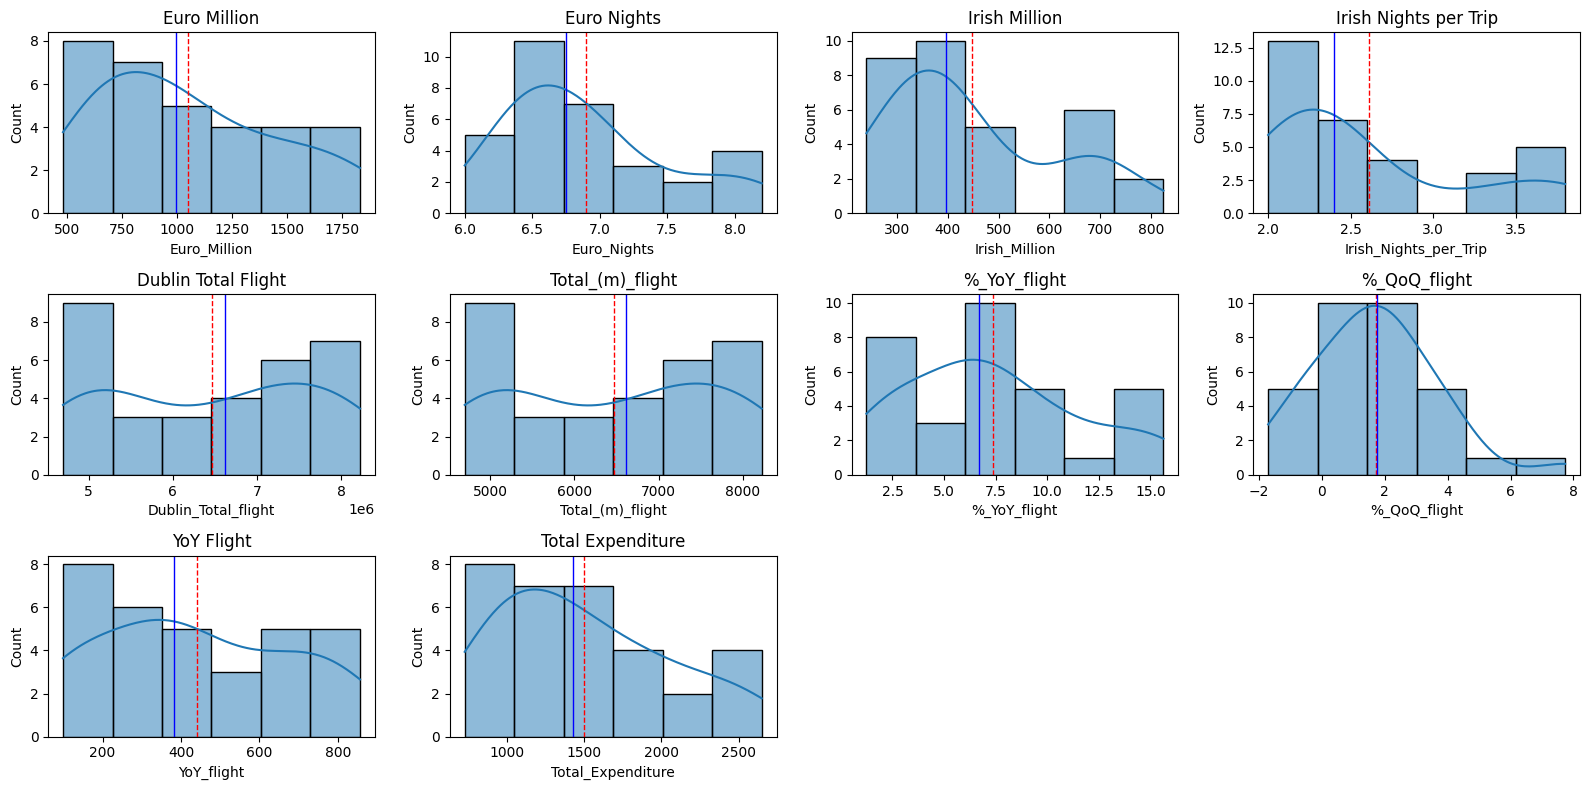

In [672]:
# Create a figure and axes with three rows and four columns
fig, axes = plt.subplots(3, 4, figsize=(16, 8))

# Plot histogram for the first row
sns.histplot(x=df['Euro_Million'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Euro Million')
axes[0, 0].axvline(df['Euro_Million'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 0].axvline(df['Euro_Million'].median(), color='blue', linestyle='-', linewidth=1, label='Median')


sns.histplot(x=df['Euro_Nights'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Euro Nights')
axes[0, 1].axvline(df['Euro_Nights'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 1].axvline(df['Euro_Nights'].median(), color='blue', linestyle='-', linewidth=1, label='Median')


sns.histplot(x=df['Irish_Million'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Irish Million')
axes[0, 2].axvline(df['Irish_Million'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 2].axvline(df['Irish_Million'].median(), color='blue', linestyle='-', linewidth=1, label='Median')

sns.histplot(x=df['Irish_Nights_per_Trip'], kde=True, ax=axes[0, 3])
axes[0, 3].set_title('Irish Nights per Trip')
axes[0, 3].axvline(df['Irish_Nights_per_Trip'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 3].axvline(df['Irish_Nights_per_Trip'].median(), color='blue', linestyle='-', linewidth=1, label='Median')


# Plot histograms for the second row
sns.histplot(df['Dublin_Total_flight'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Dublin Total Flight')
axes[1, 0].axvline(df['Dublin_Total_flight'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[1, 0].axvline(df['Dublin_Total_flight'].median(), color='blue', linestyle='-', linewidth=1, label='Median')


sns.histplot(df['Total_(m)_flight'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total_(m)_flight')
axes[1, 1].axvline(df['Total_(m)_flight'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[1, 1].axvline(df['Total_(m)_flight'].median(), color='blue', linestyle='-', linewidth=1, label='Median')


sns.histplot(df['%_YoY_flight'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('%_YoY_flight')
axes[1, 2].axvline(df['%_YoY_flight'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[1, 2].axvline(df['%_YoY_flight'].median(), color='blue', linestyle='-', linewidth=1, label='Median')


sns.histplot(df['%_QoQ_flight'], kde=True, ax=axes[1, 3])
axes[1, 3].set_title('%_QoQ_flight')
axes[1, 3].axvline(df['%_QoQ_flight'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[1, 3].axvline(df['%_QoQ_flight'].median(), color='blue', linestyle='-', linewidth=1, label='Median')


#plotting histograms for the third row 
sns.histplot(df['YoY_flight'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('YoY Flight')
axes[2, 0].axvline(df['YoY_flight'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[2, 0].axvline(df['YoY_flight'].median(), color='blue', linestyle='-', linewidth=1, label='Median')

sns.histplot(df['Total_Expenditure'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Total Expenditure')
axes[2, 1].axvline(df['Total_Expenditure'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[2, 1].axvline(df['Total_Expenditure'].median(), color='blue', linestyle='-', linewidth=1, label='Median')

# Hide the empty subplots in the third row (bottom-right corner)
axes[2, 2].axis('off')
axes[2, 3].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show();

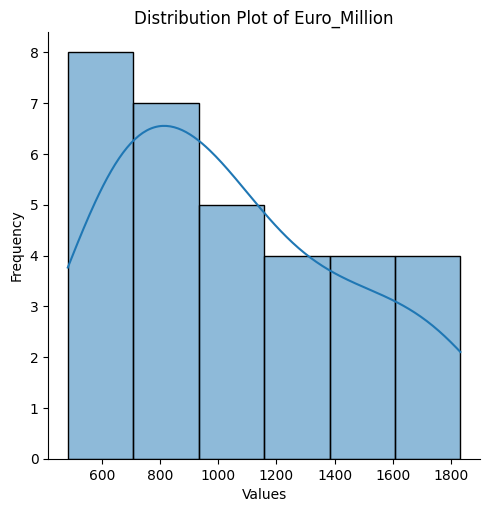

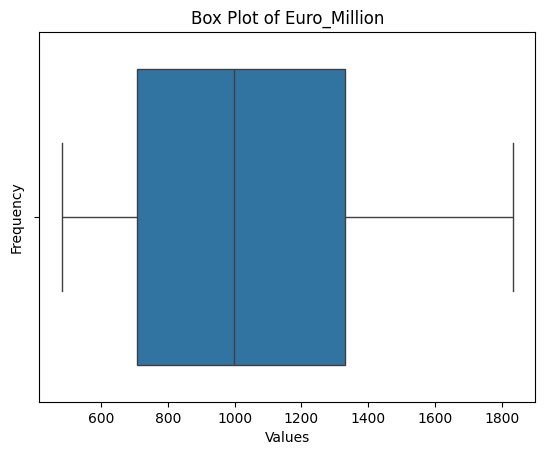

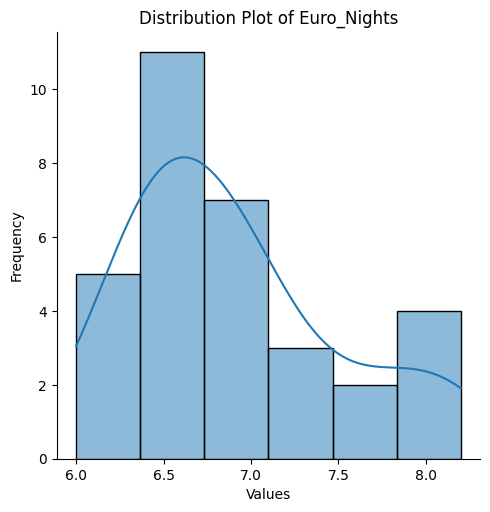

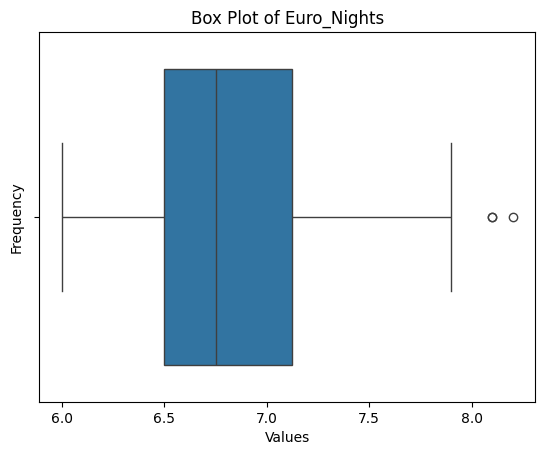

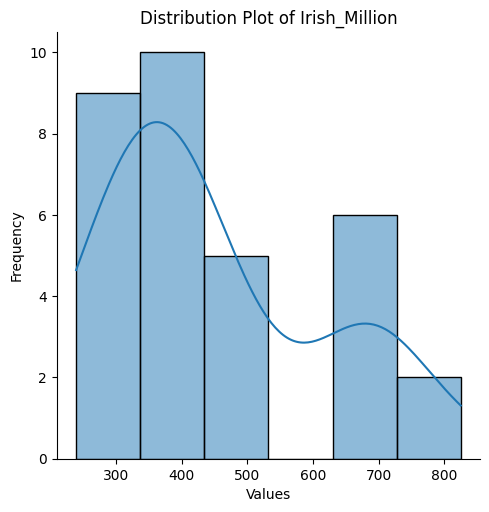

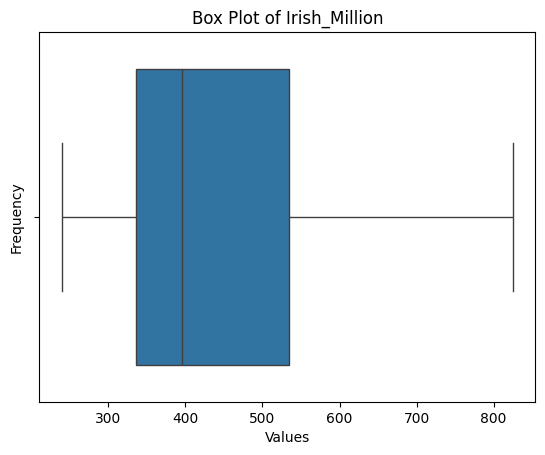

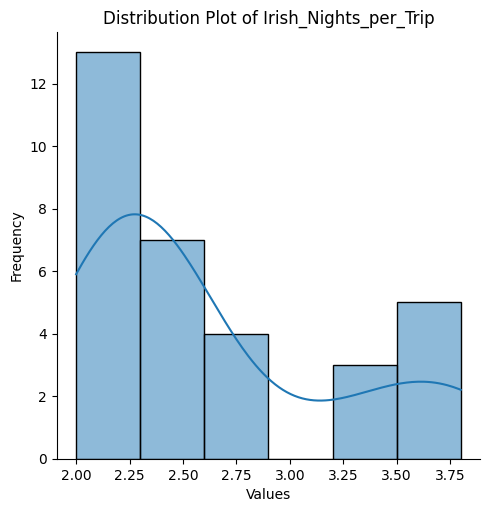

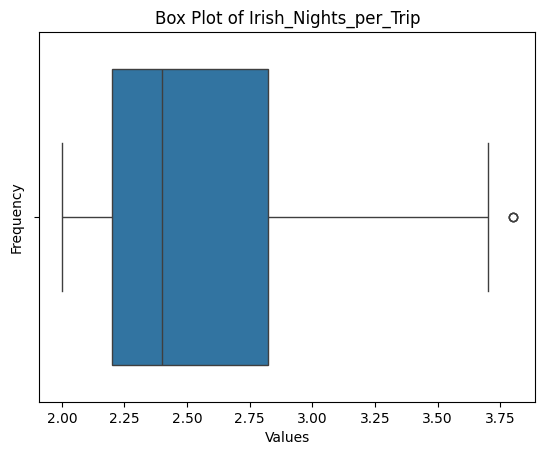

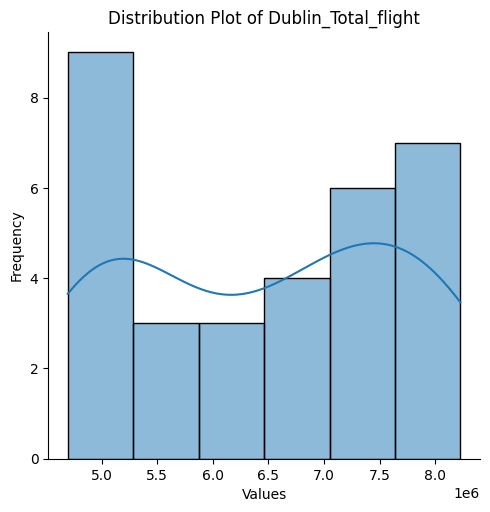

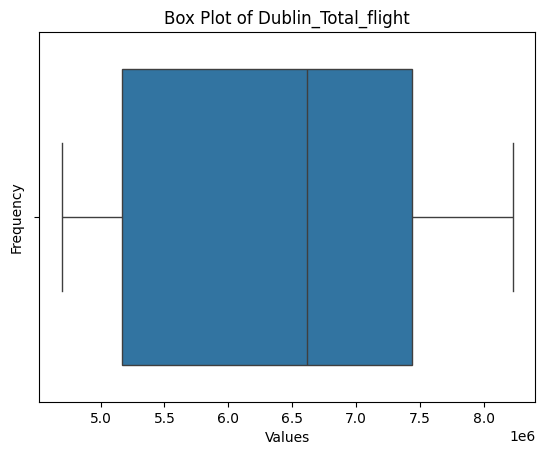

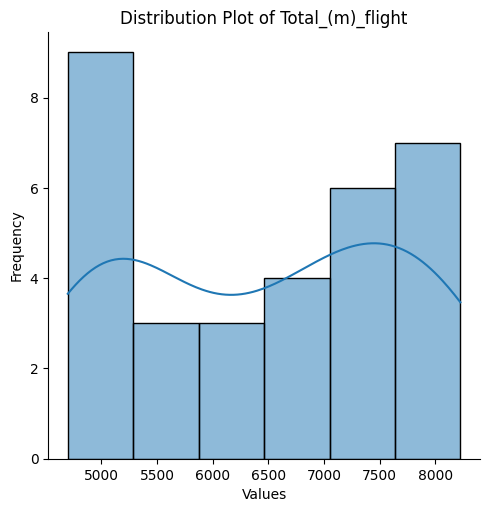

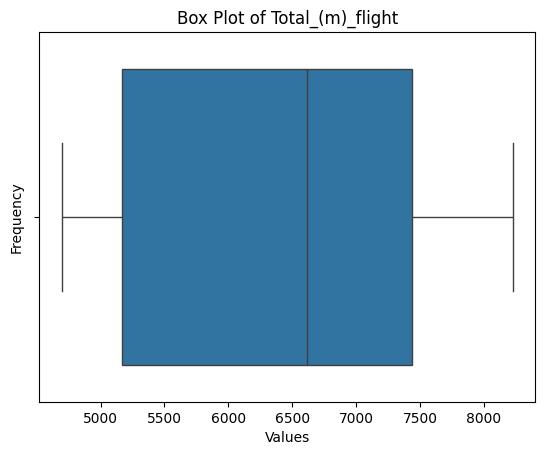

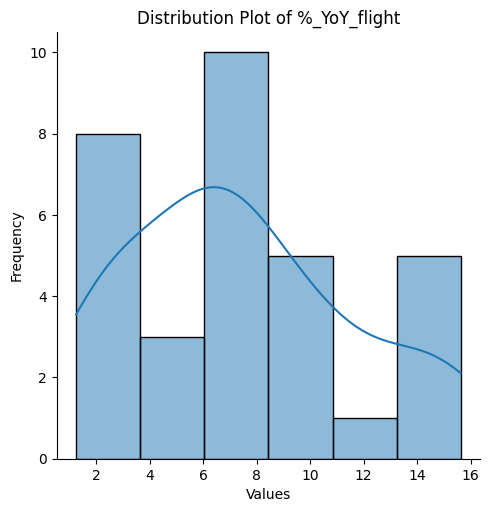

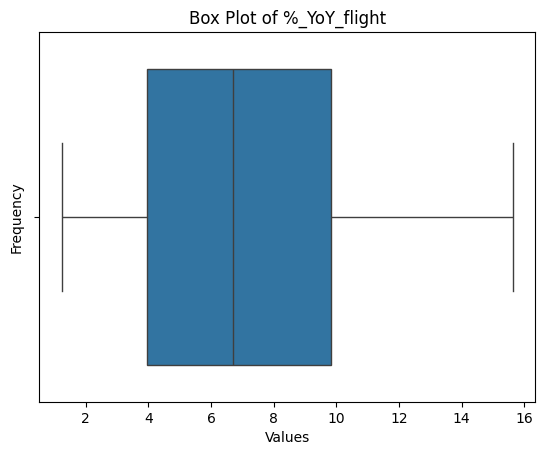

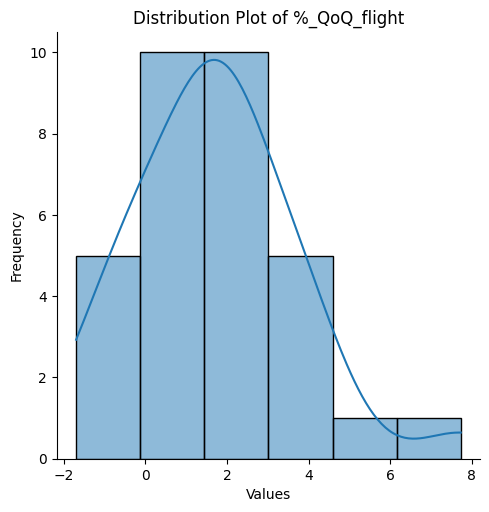

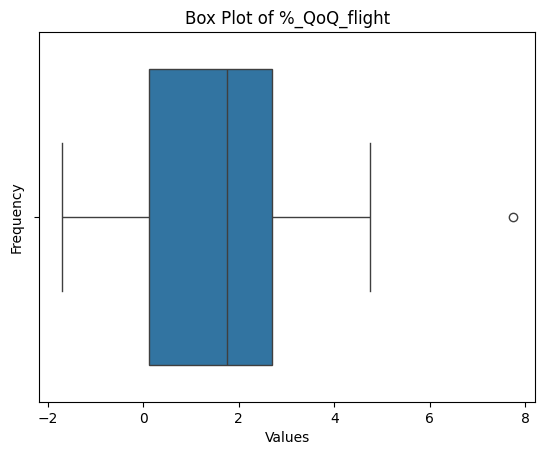

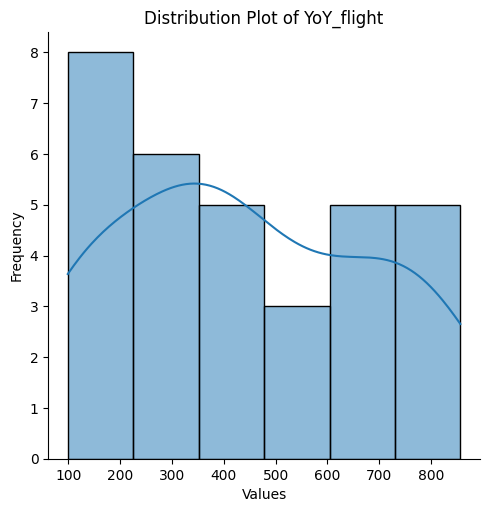

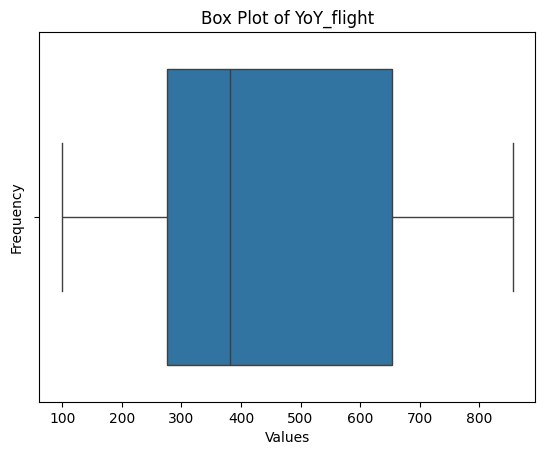

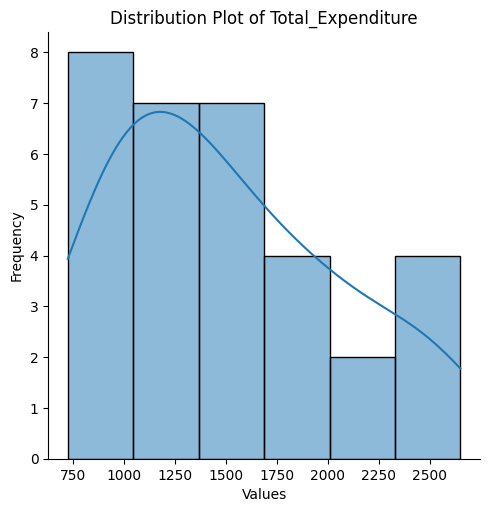

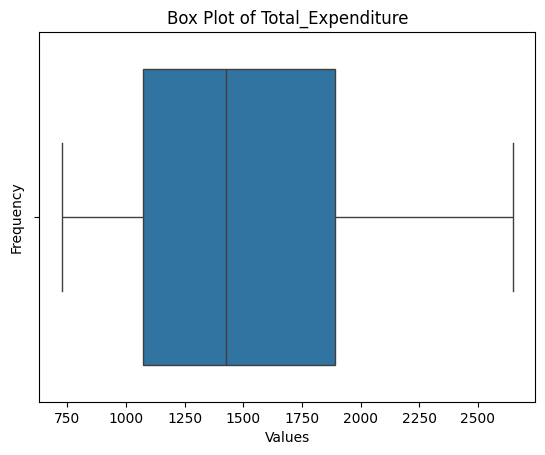

In [673]:
# Check if the the data is normally distributed
# Loop through each column in the DataFrame
for column in df.columns:
    # Create a distribution plot for numeric columns
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.displot(data=df, x=column, kde=True)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution Plot of {column}')
        plt.show();
        
        sns.boxplot(data=df, x=column)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(f'Box Plot of {column}')
        plt.show();

### Visualisations 

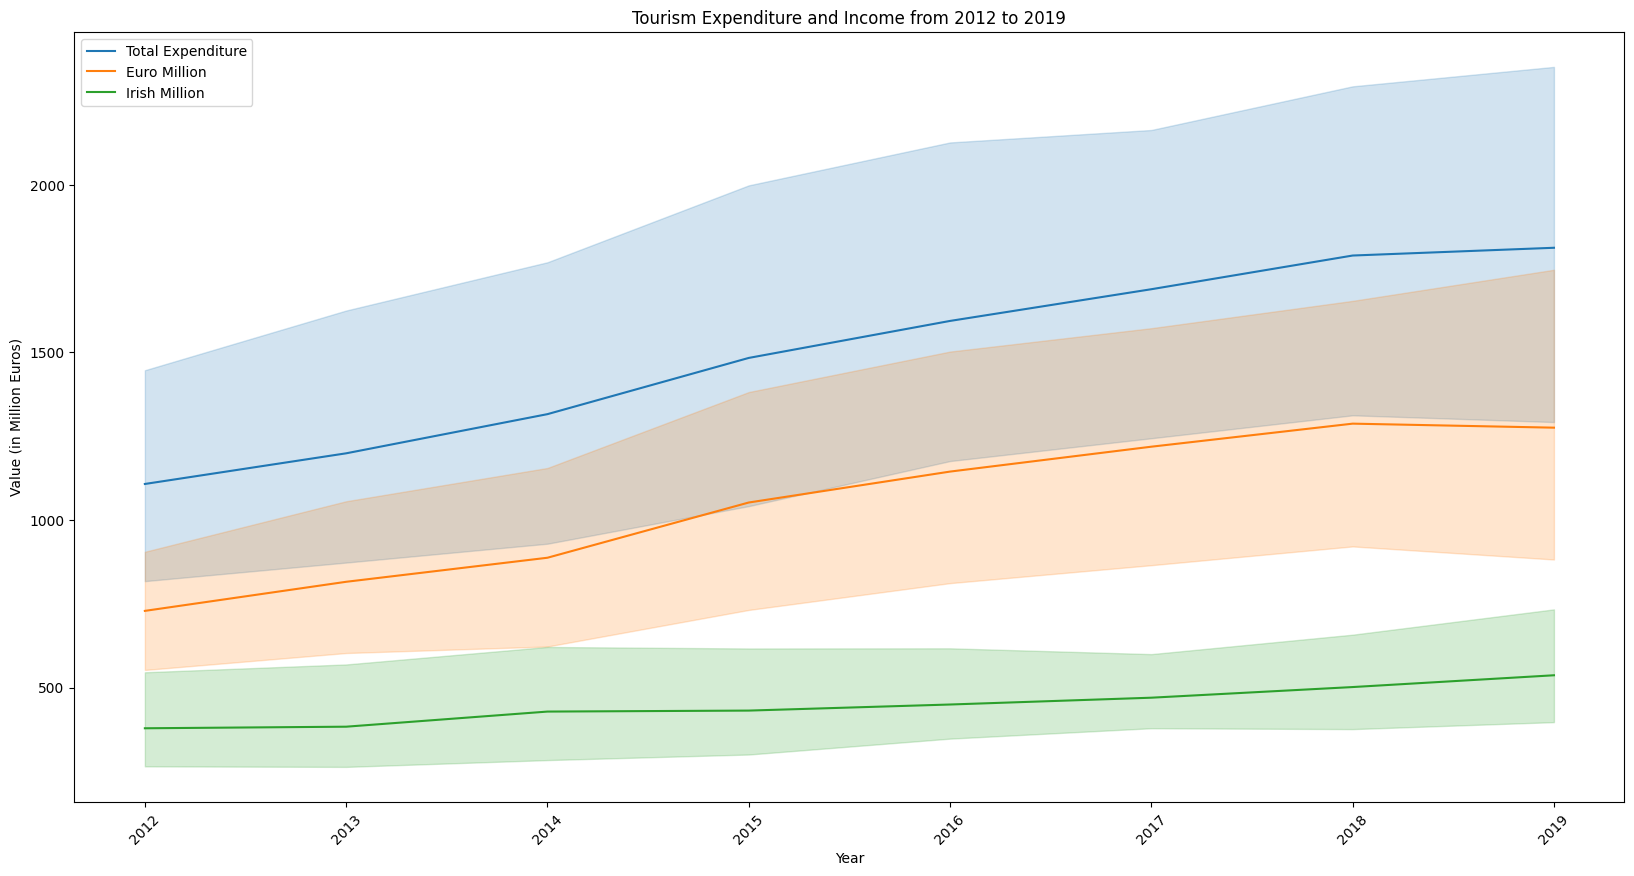

In [674]:
# Convert the 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Create a new DataFrame to extract the year from the date
df['Year'] = df['Date'].dt.year

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the relevant lines
sns.lineplot(x="Year", y="Total_Expenditure", data=df, label="Total Expenditure", palette='viridis')
sns.lineplot(x="Year", y="Euro_Million", data=df, label="Euro Million", palette='viridis')
sns.lineplot(x="Year", y="Irish_Million", data=df, label="Irish Million", palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value (in Million Euros)')
plt.title('Tourism Expenditure and Income from 2012 to 2019')
plt.xticks(rotation=45)

# Show legend
plt.legend(loc='upper left');

# Show the line plot
plt.show()


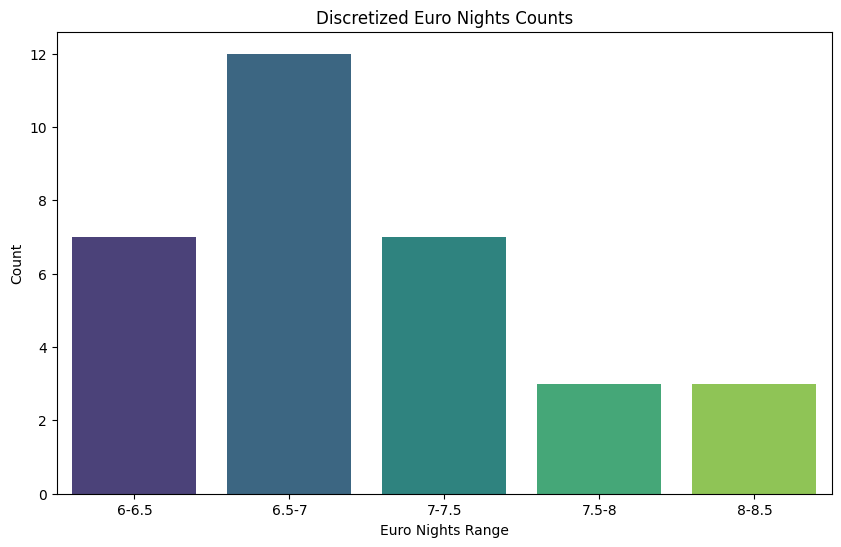

In [675]:
# Discretize Euro_Nights into bins
bins = [6, 6.5, 7, 7.5, 8, 8.5]
labels = ['6-6.5', '6.5-7', '7-7.5', '7.5-8', '8-8.5']
df['Euro_Nights_Discretized'] = pd.cut(df['Euro_Nights'], bins=bins, labels=labels, right=False)

# Plot the discretized data
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Euro_Nights_Discretized', color="skyblue", palette='viridis' )
plt.xlabel('Euro Nights Range')
plt.ylabel('Count')
plt.title('Discretized Euro Nights Counts')
plt.show()

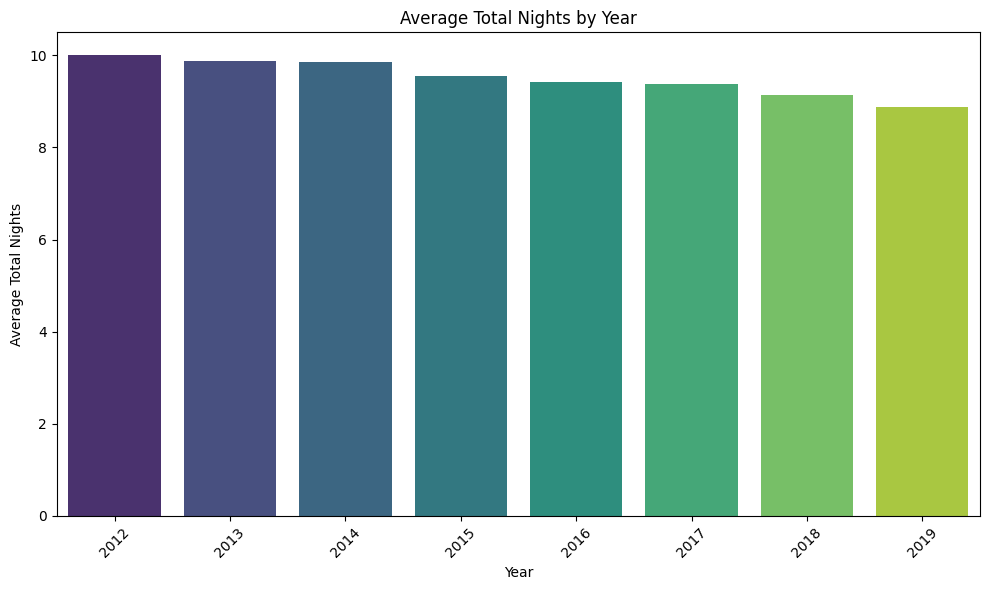

In [676]:
# running a groupby to get average expenditrue per year 
df['Total_Nights'] = df['Euro_Nights'] + df['Irish_Nights_per_Trip']
avg_nights_by_year = df.groupby('Year')['Total_Nights'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total_Nights', data=avg_nights_by_year, palette='viridis')
plt.title('Average Total Nights by Year')
plt.xlabel('Year')
plt.ylabel('Average Total Nights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

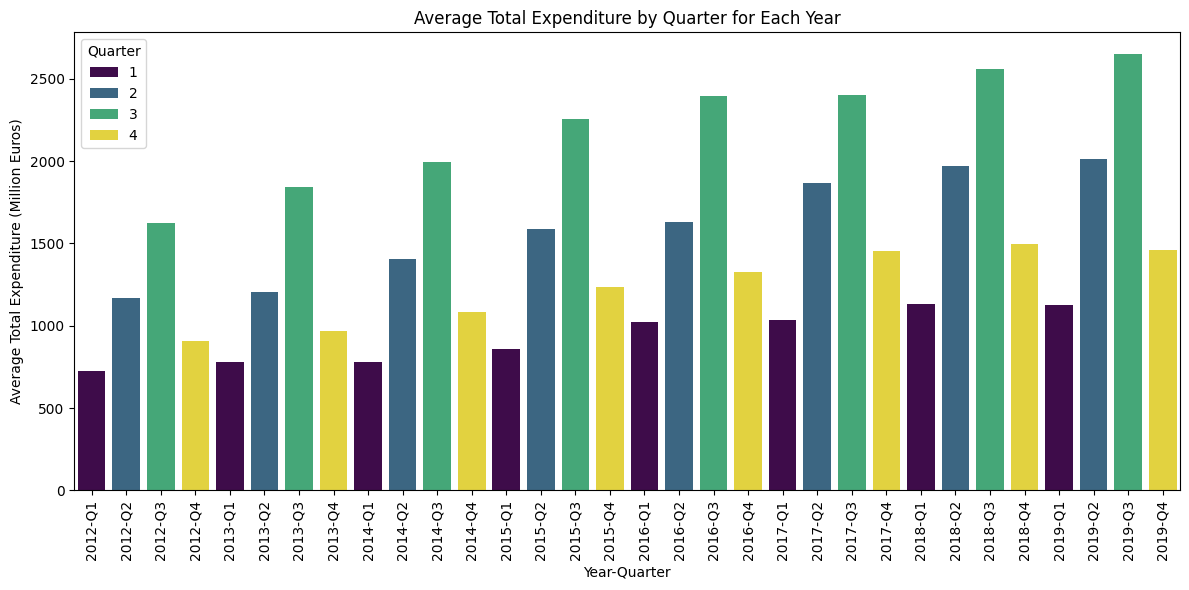

In [677]:

# Assuming your 'Date' column is in datetime format
df['Year'] = df['Date'].dt.year  # Extract the year
df['Quarter'] = df['Date'].dt.quarter  # Extract the quarter

# Group by Year and Quarter and calculate the average expenditure
avg_expenditure_by_quarter = df.groupby(['Year', 'Quarter'])['Total_Expenditure'].mean().reset_index()

# Create a new column for display purposes (e.g., "Year-Quarter")
avg_expenditure_by_quarter['Year_Quarter'] = avg_expenditure_by_quarter['Year'].astype(str) + '-Q' + avg_expenditure_by_quarter['Quarter'].astype(str)

# Plotting the average total expenditure by Year and Quarter
plt.figure(figsize=(12, 6))
sns.barplot(x='Year_Quarter', y='Total_Expenditure', data=avg_expenditure_by_quarter, hue = "Quarter", palette='viridis')
plt.title('Average Total Expenditure by Quarter for Each Year')
plt.xlabel('Year-Quarter')
plt.ylabel('Average Total Expenditure (Million Euros)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


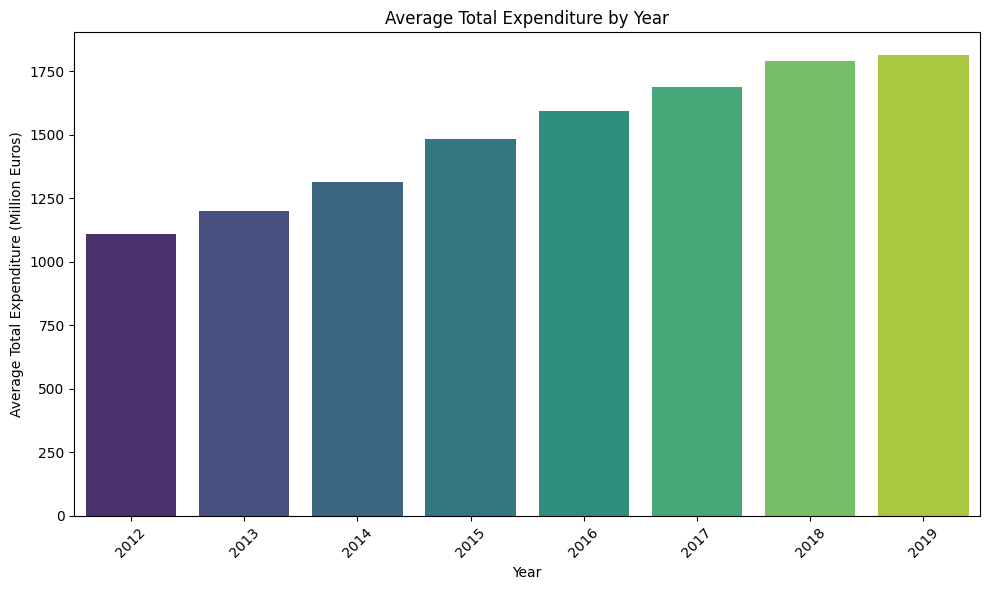

In [678]:
# running a groupby to get average expenditrue per year 
avg_expenditure_by_year = df.groupby('Year')['Total_Expenditure'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total_Expenditure', data=avg_expenditure_by_year, palette='viridis')
plt.title('Average Total Expenditure by Year')
plt.xlabel('Year')
plt.ylabel('Average Total Expenditure (Million Euros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

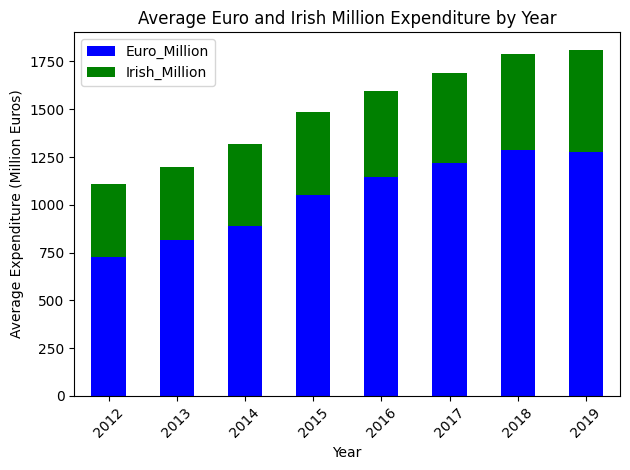

In [679]:
# Average Euro and Irish Million by Year
avg_million_by_year = df.groupby('Year')[['Euro_Million', 'Irish_Million']].mean().reset_index()

plt.figure(figsize=(12, 6))
avg_million_by_year.plot(x='Year', kind='bar', stacked=True, color=['blue', 'green'])
plt.title('Average Euro and Irish Million Expenditure by Year')
plt.xlabel('Year')
plt.ylabel('Average Expenditure (Million Euros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## STATISTICS

## Normal Distribution 

In [680]:
#Total expenditure is chosen as the continuous feature 
df['Total_Expenditure'].describe()

count      32.000000
mean     1498.440625
std       554.432224
min       726.800000
25%      1072.225000
50%      1427.600000
75%      1890.625000
max      2648.900000
Name: Total_Expenditure, dtype: float64

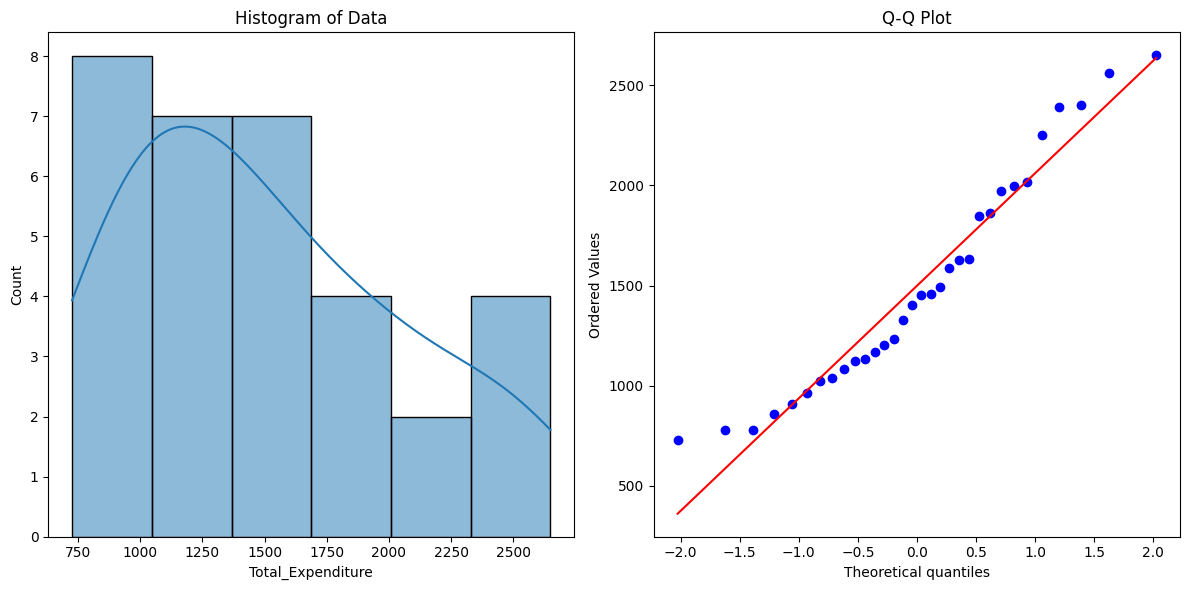

In [681]:
# Data
data = df['Total_Expenditure']

# 1. Visual Inspection with Histogram and Q-Q Plot
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title("Histogram of Data")

# Q-Q Plot
plt.subplot(1, 2, 2)
probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()

## Visual Inspection
Histogram with KDE Plot The histogram provides an initial look at the shape of the distribution. Additionally, a Kernel Density Estimate (KDE) curve overlays the histogram, which helps to identify skewness or deviations from normality.

The histogram appears to show a distribution that has slight skewness, which may indicate some deviation from normality. The KDE overlay provides more smoothness to the data visualization and suggests that the data may have slight right skewness.

In the Q-Q plot, most points align with the diagonal line, but there are minor deviations, especially in the tails. This suggests that the data is approximately normal, though with slight deviations.

In [682]:
# 2. Shapiro-Wilk Test for Normality
shapiro_test_stat, shapiro_p_value = shapiro(data)

shapiro_test_stat, shapiro_p_value

(0.9397191732106276, 0.07350594433035376)

## Shapiro-Wilk Test for Normality

The Shapiro-Wilk test is a formal statistical test used to determine whether a sample comes from a normal distribution. The test provides a test statistic and a p-value.

Null Hypothesis (
𝐻
0
H 
0
​
 ): The data follows a normal distribution.

Alternative Hypothesis (
𝐻
1
H 
1
​
 ): The data does not follow a normal distribution.
The test outputs are as follows:

Shapiro-Wilk Test Statistic: 0.940
p-value: 0.074
Interpretation
Since the p-value (0.074) is greater than the typical significance level (𝛼=0.05)

we fail to reject the null hypothesis. 

This result suggests that there is insufficient evidence to conclude that the distribution of Total_Expenditure significantly deviates from normality.

In [683]:
#Total expenditure is chosen as the continuous feature 
df['Total_Expenditure'].describe()

count      32.000000
mean     1498.440625
std       554.432224
min       726.800000
25%      1072.225000
50%      1427.600000
75%      1890.625000
max      2648.900000
Name: Total_Expenditure, dtype: float64

In [684]:
# Determining mu and sigma 
mu = df['Total_Expenditure'].mean()
sigma = df['Total_Expenditure'].std()

print(mu)
print(sigma)

1498.440625
554.4322244622668


The Total Expenditure data exhibits a positive linear relationship, suggesting a steady growth in expenditures over time.

The data shows minimal fluctuations, indicating that spending patterns are reliable and predictable.

By setting thresholds close to the mean, we prioritize monitoring normal fluctuations in spending. This approach allows us to identify typical behaviors rather than being influenced by extreme values or outliers

These targeted thresholds will enable the identification of actionable insights. For instance, tracking when expenditures fall below the established lower threshold could trigger a review of marketing strategies, while spending above the upper threshold could highlight successful campaigns or seasonal peaks.

The choice of thresholds is grounded in the statistical properties of the data. By using the mean as a central reference point, to maintain relevance to the distribution of the expenditure data. This allows for meaningful comparisons and analyses that are reflective of underlying spending behavior.

In [685]:
#Running probabilites on the data 
# Probability that Total_Expenditure is less than 1400
prob_less_than_1400 = norm.cdf(1400, mu, sigma)
print("P(Total_Expenditure < 1400):", prob_less_than_1400)

# Probability that Total_Expenditure is greater than 1600
prob_greater_than_1600 = 1 - norm.cdf(1700, mu, sigma)
print("P(Total_Expenditure > 1600):", prob_greater_than_1600)


# Probability that Total_Expenditure is between 1400 and 1600
prob_between_1400_and_1600 = prob_greater_than_1600 - prob_less_than_1400
print("P(1400 < Total_Expenditure < 1600):", prob_between_1400_and_1600)

P(Total_Expenditure < 1400): 0.4295373590527457
P(Total_Expenditure > 1600): 0.35810003887158903
P(1400 < Total_Expenditure < 1600): -0.07143732018115667


# Binomial 

Using the average nights spent as a threshold in a binomial framework is justified by the clear definition of success, the independent nature of trials, the calculated probability based on actual data, and the theoretical backing from statistical principles. This method allows for meaningful insights into tourist behavior and can guide strategies for enhancing the tourism experience and revenue in Ireland.

As the dataset contains no direct discrete variables, feature engineering will be implemented below to get variables that will work with a binomial distribution, i.e. positive whole numbers that are count data 

In [686]:
# Step 1: Define success criteria
df['Total_Nights'] = df['Euro_Nights']+ df['Irish_Nights_per_Trip']
print(df['Total_Nights'].mean())
threshold = 10  # Example threshold for Euro Nights set just above the mean. 
df['Success'] = (df['Total_Nights']> threshold).astype(int)  # Binary success column

df['Total_Nights'].describe()


9.5125


count    32.000000
mean      9.512500
std       1.174665
min       8.000000
25%       8.675000
50%       9.100000
75%       9.850000
max      12.000000
Name: Total_Nights, dtype: float64

In [687]:
# Step 2: Calculate number of trials and successes
n = len(df)  # Total number of entries
k = df['Success'].sum()  # Total successes

# Step 3: Calculate probability of success
p = k / n  # Probability of success

# Step 4: Calculate probabilities using binomial distribution
probabilities = [binom.pmf(k, n, p) for k in range(n+1)]  # Probability for k successes

# Display results
print(f"Probability of success (p): {p}")
print(f"Total successes (k): {k}")
print(f"Total trials (n): {n}")
print("Probabilities of k successes:", probabilities)

Probability of success (p): 0.25
Total successes (k): 8
Total trials (n): 32
Probabilities of k successes: [0.00010045242572063346, 0.0010714925410200901, 0.005536044795270452, 0.018453482650901527, 0.04459591640634534, 0.08324571062517801, 0.12486856593776699, 0.15459917687533045, 0.16104080924513609, 0.14314738599567647, 0.10974632926335182, 0.07316421950890106, 0.042679128046859, 0.021886732331722707, 0.00990114081673167, 0.003960456326692657, 0.0014026616157036507, 0.0004400507029658524, 0.00012223630637940328, 3.0022952444063937e-05, 6.504973029547183e-06, 1.2390424818185103e-06, 2.0650708030308476e-07, 2.9928562362765916e-08, 3.741070295345744e-09, 3.990474981702131e-10, 3.5811954963993495e-11, 2.652737404740255e-12, 1.579010359964435e-13, 7.25981774696292e-15, 2.419939248987641e-16, 5.2041704279304236e-18, 5.421010862427522e-20]


Probability of Success (p = 0.25)
The probability of success is approximately 25%, indicating that one-quarter of tourists are classified as high-value spenders based on their combined nights spent, defined by exceeding a threshold of 10 nights. This statistic highlights a significant segment of visitors who contribute positively to the Irish economy. Given this information, it is essential to consider targeted strategies that focus on enhancing the experiences of these high-value tourists to encourage their continued patronage and spending.

Total Successes (k = 8)
In this analysis, 8 out of 32 tourists exceeded the defined threshold for combined nights spent. This level of engagement suggests that while a notable portion of tourists is high-value, there remains significant room for improvement in attracting additional high-spending visitors.

Probabilities of k Successes
The calculated probabilities of achieving various levels of success (number of tourists exceeding the threshold) are as follows:

The probability of observing 0 successes is approximately 0.0001, indicating it is highly unlikely that no tourists would exceed the threshold.
The probabilities peak around 8 to 10 successes, with the highest probability of approximately 0.161 for 9 successes, demonstrating that achieving around 8 to 10 high-value tourists is the most likely outcome.
As the number of successes increases beyond this range, the probabilities gradually decline, with very low likelihoods for significantly higher numbers of successes.

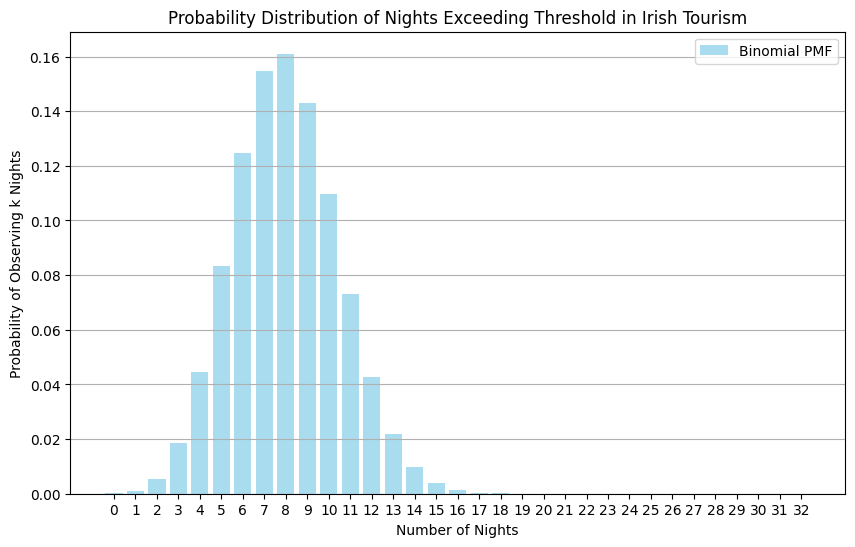

In [688]:
# Parameters
x = np.arange(0, n + 1)  # Number of possible successes 

# Binomial distribution
binom_pmf = binom.pmf(x, n, p)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, binom_pmf, color='skyblue', alpha=0.7, label='Binomial PMF')
plt.title('Probability Distribution of Nights Exceeding Threshold in Irish Tourism')
plt.xlabel('Number of Nights')
plt.ylabel('Probability of Observing k Nights')
plt.xticks(x)
plt.legend()
plt.grid(axis='y')
plt.show()

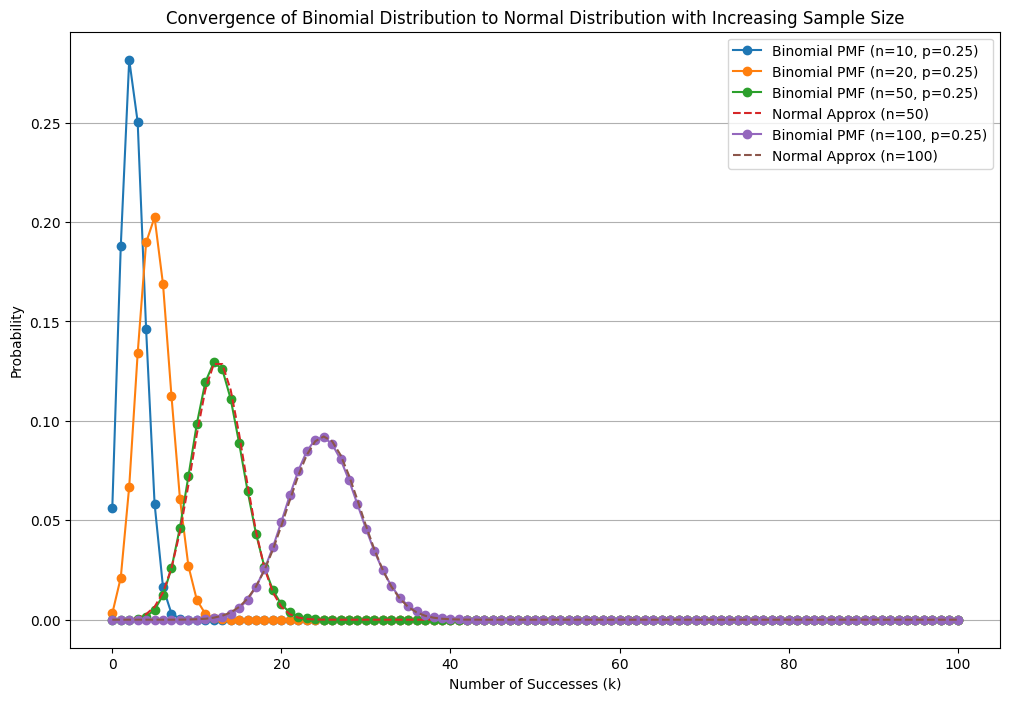

Probability of success (p): 0.25
Total successes (k): 8


In [689]:
# Step 1: Define initial parameters
p = df['Success'].mean()  # Probability of success calculated from actual data

# Define different sample sizes to observe convergence towards normality
sample_sizes = [10, 20, 50, 100,]
x_values = np.arange(0, max(sample_sizes) + 1)

# Step 2: Plot PMF for each sample size
plt.figure(figsize=(12, 8))
for n in sample_sizes:
    # Calculate binomial PMF for current sample size
    binom_pmf = binom.pmf(x_values, n, p)
    
    # Plot binomial PMF
    plt.plot(x_values, binom_pmf, marker='o', label=f'Binomial PMF (n={n}, p={p:.2f})')
    
    # Plot corresponding normal approximation for large n
    if n >= 50:  # Using normal approximation for large n
        mean, std_dev = n * p, np.sqrt(n * p * (1 - p))
        normal_approx = norm.pdf(x_values, mean, std_dev)
        plt.plot(x_values, normal_approx, linestyle='--', label=f'Normal Approx (n={n})')

# Step 3: Configure plot
plt.title('Convergence of Binomial Distribution to Normal Distribution with Increasing Sample Size')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.legend()
plt.grid(axis='y')
plt.show()

# Display the initial probability and number of successes
print(f"Probability of success (p): {p}")
print(f"Total successes (k): {df['Success'].sum()}")

## Poisson 

Lambda (average production rate): 497.3581730769231


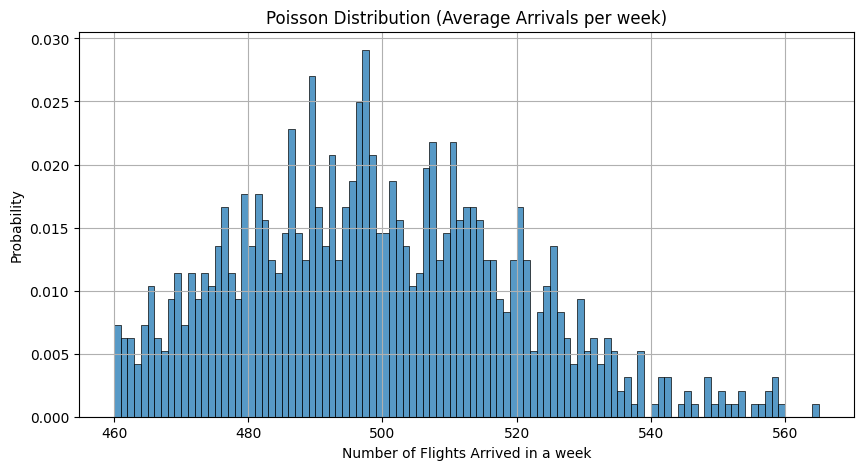

In [690]:
# Assume λ is based on average flights 
lambda_rate = df['Total_(m)_flight'].sum() / (32 * 13)  # Total flights divided  number of rows * total weeks
print(f"Lambda (average production rate): {lambda_rate}")

# Generate Poisson distribution data for weekly flight arrivals (simulating 1000 weeks)
poisson_data_batches = np.random.poisson(lambda_rate, 1000)

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(poisson_data_batches, bins=range(460, int(poisson_data_batches.max()) + 2), kde=False, stat='probability')
plt.title('Poisson Distribution (Average Arrivals per week)')
plt.xlabel('Number of Flights Arrived in a week')
plt.ylabel('Probability')
plt.grid()
plt.show()

In [691]:
# Calculate lambda (mean of integer arrival data)
print("Lambda (λ) for Poisson:", lambda_rate)

Lambda (λ) for Poisson: 497.3581730769231


In [692]:
# Probability of more than 500 arrivals in a week
prob_more_than_500 = 1 - poisson.cdf(500, lambda_rate)
print(f"Probability of more than 500 arrivals per week: {prob_more_than_500:.4f}")

# Probability of exactly 500 arrivals in a week
prob_exactly_500 = poisson.pmf(500, lambda_rate)
print(f"Probability of exactly 500 arrivals per week: {prob_exactly_500:.4f}")

# Cumulative probability of having 0 to 450 arrivals
prob_0_to_500 = poisson.cdf(500, lambda_rate)
print(f"Cumulative probability of having 0 to 500 arrivals per week: {prob_0_to_500:.4f}")


Probability of more than 500 arrivals per week: 0.4411
Probability of exactly 500 arrivals per week: 0.0177
Cumulative probability of having 0 to 500 arrivals per week: 0.5589


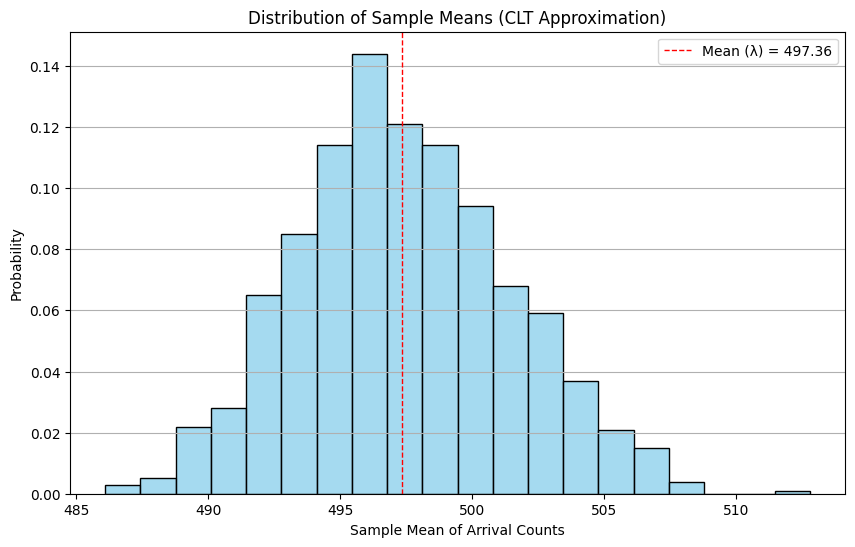

In [693]:
# Step 1: Apply the CLT by generating sample means of Poisson-distributed data
sample_size = 30  # A moderate sample size for illustration
num_samples = 1000  # Number of sample means to generate

# Generate sample means
sample_means = [np.mean(stats.poisson.rvs(mu=lambda_rate, size=sample_size)) for _ in range(num_samples)]

# Step 2: Plotting the distribution of these sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=20, kde=False, stat='probability', color='skyblue', edgecolor='black')
plt.axvline(lambda_rate, color='red', linestyle='dashed', linewidth=1, label=f'Mean (λ) = {lambda_rate:.2f}')
plt.title('Distribution of Sample Means (CLT Approximation)')
plt.xlabel('Sample Mean of Arrival Counts')
plt.ylabel('Probability')
plt.legend()
plt.grid(axis='y')
plt.show()


# Machine Learning 

### Ensuring there are no duplicates and no missing values 

In [694]:
df.isna().sum()

Date                       0
Euro_Million               0
Euro_Nights                0
Irish_Million              0
Irish_Nights_per_Trip      0
Dublin_Total_flight        0
Total_(m)_flight           0
%_YoY_flight               0
%_QoQ_flight               0
YoY_flight                 0
Total_Expenditure          0
Year                       0
Euro_Nights_Discretized    0
Total_Nights               0
Quarter                    0
Success                    0
dtype: int64

In [695]:
#plt.figure(figsize = (12,6))
#sns.pairplot(df)

In [696]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


## Feature Selection through encoding
As there are no categorical variables, encoding will not be necessary

In [697]:
df.columns

Index(['Date', 'Euro_Million', 'Euro_Nights', 'Irish_Million',
       'Irish_Nights_per_Trip', 'Dublin_Total_flight', 'Total_(m)_flight',
       '%_YoY_flight', '%_QoQ_flight', 'YoY_flight', 'Total_Expenditure',
       'Year', 'Euro_Nights_Discretized', 'Total_Nights', 'Quarter',
       'Success'],
      dtype='object')

In [698]:
# Define features (X) and target (y)
X = df[['Euro_Million', 'Euro_Nights', 'Irish_Nights_per_Trip', 'Dublin_Total_flight', 'Total_(m)_flight', '%_YoY_flight', '%_QoQ_flight', 'YoY_flight']]
y = df['Irish_Million']

## Data Distributions 

1. Standard Scaler for Normally Distributed Features
Features: Total_(m)_flight, %_YoY_flight, %_QoQ_flight
Rationale: These features display minimal skew and are close to a normal distribution.

2. Robust Scaler for Features with Potential Outliers or Skewed Distributions
Features: Euro_Nights, Irish_Nights_per_Trip, YoY_flight
Rationale: These features are prone to skew or contain outliers. The 

3. Min-Max Scaler for Features Requiring Relative Scale Preservation
Features: Euro_Million, Irish_Million
Rationale: For features with naturally bounded values or that vary widely, the Min-Max Scaler preserves the relative scale.

In [699]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32, 8), (32,), (25, 8), (7, 8), (25,), (7,))

## Linear Regression 

In [700]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
y_train_pred = regression.predict(X_train)

In [701]:
print("Training set score: {:.2f}".format(regression.score(X_train,y_train)))
print("Test set score: {:.2f}\n".format(regression.score(X_test,y_test)))

# Metrics for training data 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_train, y_train_pred, squared=False))
print("R² Score:", metrics.r2_score(y_train, y_train_pred),"\n")

# Metrics for test data 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", metrics.r2_score(y_test, y_pred)) 

Training set score: 0.99
Test set score: 0.91

Mean Absolute Error: 15.279699136798968
Mean Squared Error: 350.3435437968055
Root Mean Squared Error: 18.717466276096385
R² Score: 0.985969077628383 

Mean Absolute Error: 44.032184146521104
Mean Squared Error: 2851.9538685754196
Root Mean Squared Error: 53.403687780671284
R² Score: 0.9065048042138231


In [702]:
# Example structure for one model (Linear Regression)
lr_metrics_dict = {
    'Model': 'Linear Regression',
    'Training Set Score': regression.score(X_train, y_train),
    'Training MAE': metrics.mean_absolute_error(y_train, y_train_pred),
    'Training MSE': metrics.mean_squared_error(y_train, y_train_pred),
    'Training RMSE': metrics.mean_squared_error(y_train, y_train_pred, squared=False),
    'Training R²': metrics.r2_score(y_train, y_train_pred),
    'Test Set Score': regression.score(X_test, y_test),
    'Test MAE': metrics.mean_absolute_error(y_test, y_pred),
    'Test MSE': metrics.mean_squared_error(y_test, y_pred),
    'Test RMSE': metrics.mean_squared_error(y_test, y_pred, squared=False),
    'Test R²': metrics.r2_score(y_test, y_pred)
}


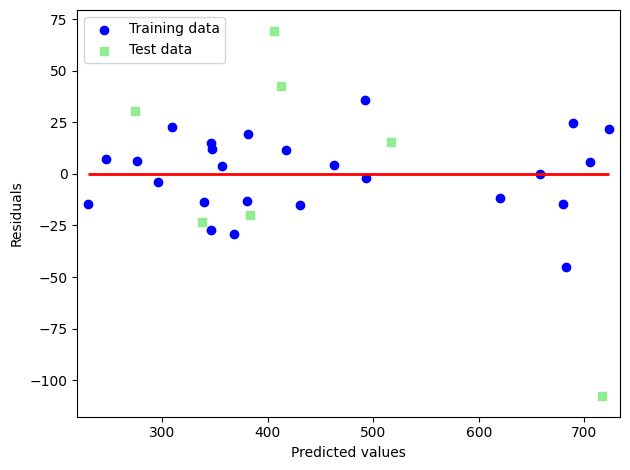

In [703]:
# Calculate residuals
residuals_train = y_train_pred - y_train
residuals_test = y_test_pred - y_test

# Display the graph for the training and testing of the data
plt.scatter(y_train_pred, residuals_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, residuals_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), lw=2, color='red')

# Optional: Adjust limits dynamically
plt.xlim([min(min(y_train_pred), min(y_test_pred)) - 10, max(max(y_train_pred), max(y_test_pred)) + 10])
plt.ylim([min(residuals_train.min(), residuals_test.min()) - 10, max(residuals_train.max(), residuals_test.max()) + 10])

plt.tight_layout()
plt.show()

                 Feature   Coefficient
3    Dublin_Total_flight  21524.788048
2  Irish_Nights_per_Trip    149.841591
5           %_YoY_flight     64.006674
1            Euro_Nights      8.598976
6           %_QoQ_flight     -1.648999
0           Euro_Million     -4.684033
7             YoY_flight    -77.658085
4       Total_(m)_flight -21427.468347


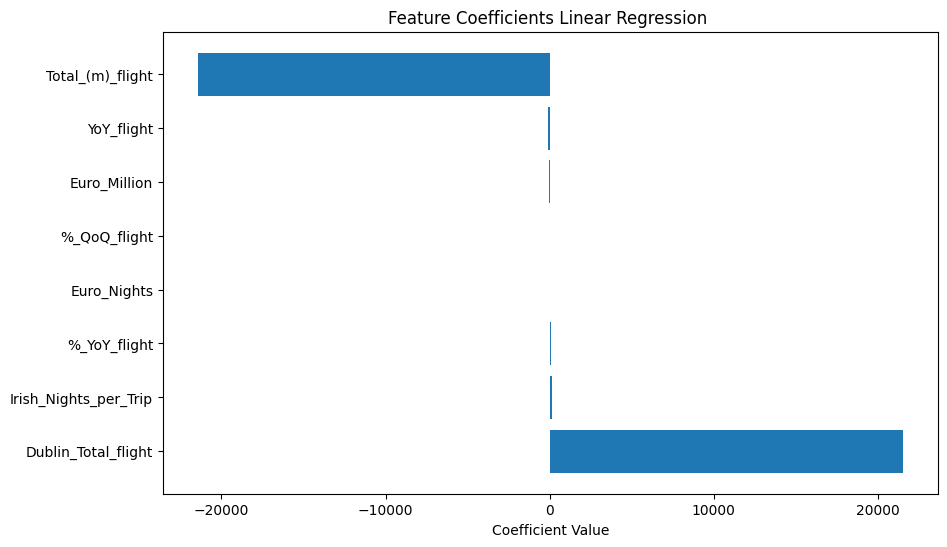

In [704]:
# Get the coefficients
coefficients = regression.coef_
feature_names = X.columns

# Create a DataFrame for visualization
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient value
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients Linear Regression ')
plt.show()

In [705]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regression, X, y, cv=5)
print("Cross-validated scores:", cv_scores)
print("Mean cross-validated score: {:.2f}".format(cv_scores.mean()))

Cross-validated scores: [0.98443408 0.94089147 0.93158186 0.80682365 0.72216747]
Mean cross-validated score: 0.88


## Hyper Parameter Tuning 

## Lasso Regression 

In [706]:
# Set up the Ridge model and a parameter grid
lasso_model = Lasso()
param_grid = {'alpha': [0.01,0.1, 1.0, 10.0, 100.0]}
lasso_regressor = GridSearchCV(lasso_model, param_grid, cv=5)

# Fit the model
lasso_regressor.fit(X_train, y_train)

# Get the best parameters
print("Best alpha:", lasso_regressor.best_params_)

# Evaluate the best model
best_model_lasso = lasso_regressor.best_estimator_
y_test_pred = best_model_lasso.predict(X_test)

print("Test set score with Lasso: {:.2f}".format(best_model_lasso.score(X_test, y_test)))

Best alpha: {'alpha': 1.0}
Test set score with Lasso: 0.90


In [707]:
# Scores for the Lasso model
print("Training set score (Lasso): {:.2f}".format(best_model_lasso.score(X_train, y_train)))
print("Test set score (Lasso): {:.2f}".format(best_model_lasso.score(X_test, y_test)))

# Metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", metrics.r2_score(y_test, y_pred))

# Ridge model dictionary
lasso_metrics_dict = {
    'Model': 'Lasso',
    'Training Set Score': best_model_lasso.score(X_train, y_train),
    'Training MAE': metrics.mean_absolute_error(y_train, y_train_pred),
    'Training MSE': metrics.mean_squared_error(y_train, y_train_pred),
    'Training RMSE': metrics.mean_squared_error(y_train, y_train_pred, squared=False),
    'Training R²': metrics.r2_score(y_train, y_train_pred),
    'Test Set Score': best_model_lasso.score(X_test, y_test),
    'Test MAE': metrics.mean_absolute_error(y_test, y_pred),
    'Test MSE': metrics.mean_squared_error(y_test, y_pred),
    'Test RMSE': metrics.mean_squared_error(y_test, y_pred, squared=False),
    'Test R²': metrics.r2_score(y_test, y_pred)
}

Training set score (Lasso): 0.98
Test set score (Lasso): 0.90
Mean Absolute Error: 44.032184146521104
Mean Squared Error: 2851.9538685754196
Root Mean Squared Error: 53.403687780671284
R² Score: 0.9065048042138231


                 Feature  Coefficient
2  Irish_Nights_per_Trip   137.842825
3    Dublin_Total_flight    72.470086
1            Euro_Nights    14.544344
0           Euro_Million     1.598711
4       Total_(m)_flight     0.000000
5           %_YoY_flight    -0.000000
7             YoY_flight    -1.903929
6           %_QoQ_flight    -5.188986


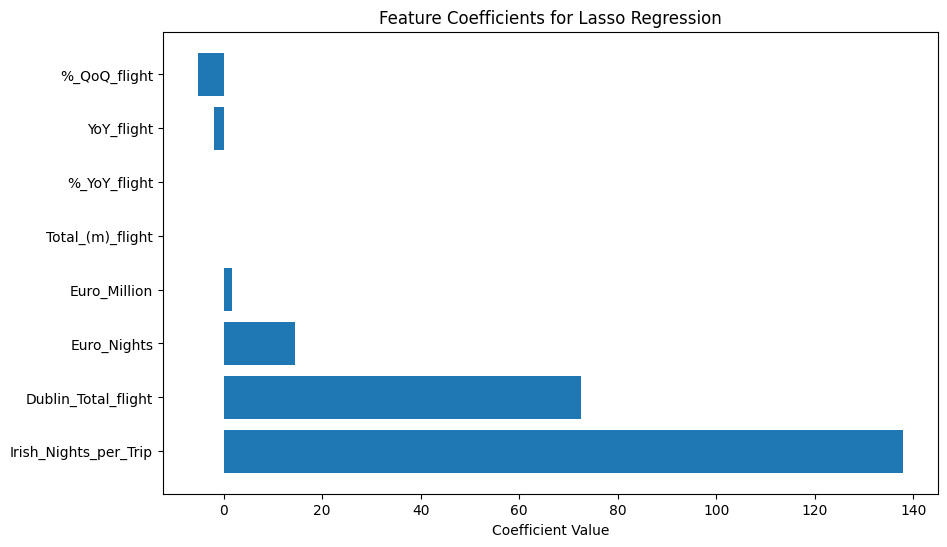

In [708]:
# Get the coefficients
coefficients = best_model_lasso.coef_
feature_names = X.columns

# Create a DataFrame for visualization
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient value
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for Lasso Regression')
plt.show()

## Ridge Regression 

In [709]:
# Set up the Ridge model and a parameter grid
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_regressor = GridSearchCV(ridge, param_grid, cv=5)

# Fit the model
ridge_regressor.fit(X_train, y_train)

# Get the best parameters
print("Best alpha:", ridge_regressor.best_params_)
print("Best score:", ridge_regressor.best_score_)

# Evaluate the best model
best_model_ridge = ridge_regressor.best_estimator_
y_test_pred = best_model_ridge.predict(X_test)

print("Test set score with Ridge: {:.2f}".format(best_model_ridge.score(X_test, y_test)))

Best alpha: {'alpha': 0.1}
Best score: 0.6743479089655222
Test set score with Ridge: 0.90


In [710]:
# Scores for the Ridge model
print("Training set score (Ridge): {:.2f}".format(best_model_ridge.score(X_train, y_train)))
print("Test set score (Ridge): {:.2f}".format(best_model_ridge.score(X_test, y_test)))

# Metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", metrics.r2_score(y_test, y_pred))

# Ridge model dictionary
ridge_metrics_dict = {
    'Model': 'Ridge',
    'Training Set Score': best_model_ridge.score(X_train, y_train),
    'Training MAE': metrics.mean_absolute_error(y_train, y_train_pred),
    'Training MSE': metrics.mean_squared_error(y_train, y_train_pred),
    'Training RMSE': metrics.mean_squared_error(y_train, y_train_pred, squared=False),
    'Training R²': metrics.r2_score(y_train, y_train_pred),
    'Test Set Score': best_model_ridge.score(X_test, y_test),
    'Test MAE': metrics.mean_absolute_error(y_test, y_pred),
    'Test MSE': metrics.mean_squared_error(y_test, y_pred),
    'Test RMSE': metrics.mean_squared_error(y_test, y_pred, squared=False),
    'Test R²': metrics.r2_score(y_test, y_pred)
}


Training set score (Ridge): 0.98
Test set score (Ridge): 0.90
Mean Absolute Error: 44.032184146521104
Mean Squared Error: 2851.9538685754196
Root Mean Squared Error: 53.403687780671284
R² Score: 0.9065048042138231


                 Feature  Coefficient
2  Irish_Nights_per_Trip   134.251751
3    Dublin_Total_flight    44.441997
4       Total_(m)_flight    44.268448
5           %_YoY_flight    40.243862
1            Euro_Nights    20.355958
0           Euro_Million     0.831990
6           %_QoQ_flight    -3.297364
7             YoY_flight   -48.960654


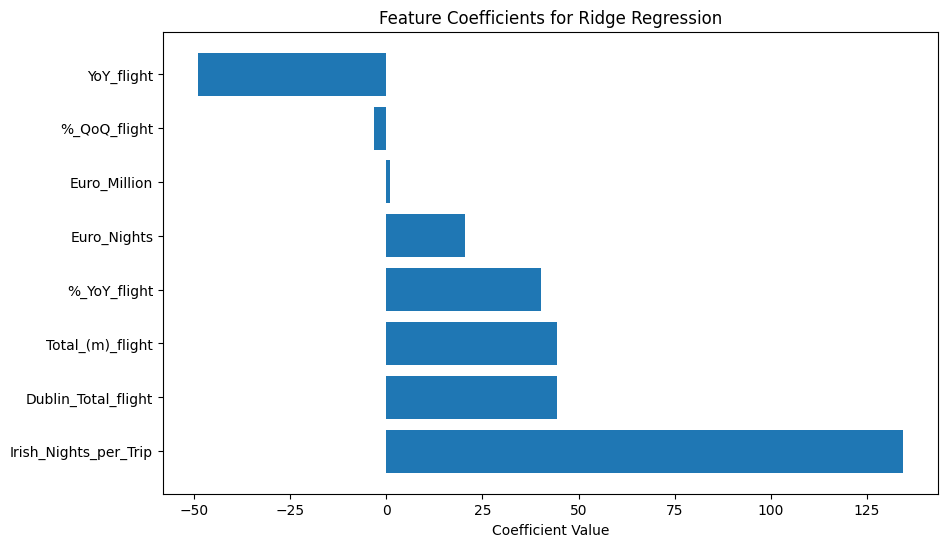

In [711]:
# Get the coefficients
coefficients = best_model_ridge.coef_
feature_names = X.columns

# Create a DataFrame for visualization
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient value
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for Ridge Regression')
plt.show()

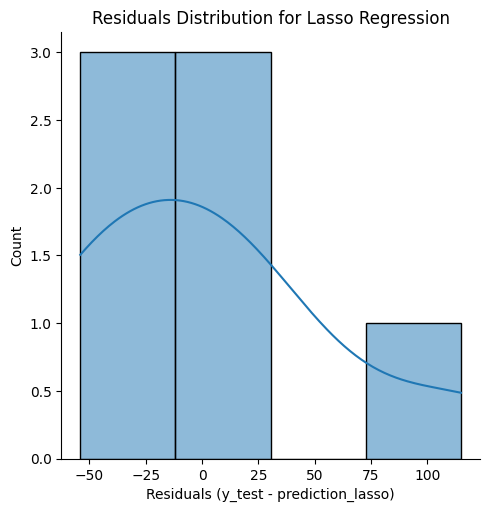

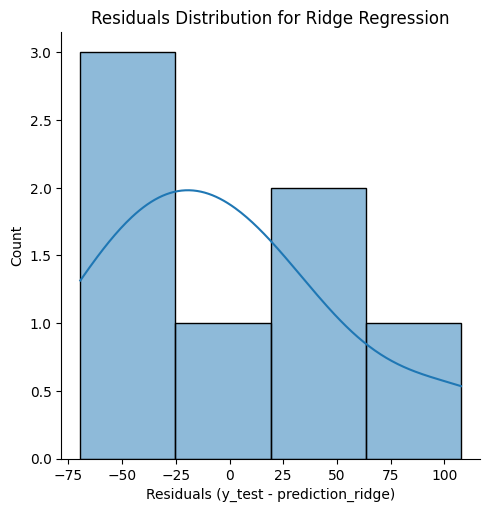

In [712]:
# Generate predictions with Lasso and Ridge models
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

# Plot residuals for Lasso predictions
sns.displot(y_test - prediction_lasso, kde=True)
plt.title("Residuals Distribution for Lasso Regression")
plt.xlabel("Residuals (y_test - prediction_lasso)")
plt.show()

# Plot residuals for Ridge predictions
sns.displot(y_test - prediction_ridge, kde=True)
plt.title("Residuals Distribution for Ridge Regression")
plt.xlabel("Residuals (y_test - prediction_ridge)")
plt.show()

## Decision Tree Regressor 

In [713]:
# Define features (X) and target (y)
X = df[['Euro_Million', 'Euro_Nights', 'Irish_Nights_per_Trip', 'Dublin_Total_flight', 'Total_(m)_flight', '%_YoY_flight', '%_QoQ_flight', 'YoY_flight']]
y = df['Irish_Million']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32, 8), (32,), (25, 8), (7, 8), (25,), (7,))

In [714]:
# Initialize the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(max_features="sqrt", max_depth=5, random_state=42).fit(X_train, y_train)

# Make predictions on the test and training sets
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)

print("Training set score: {:.2f}".format(dt_model.score(X_train,y_train)))
print("Test set score: {:.2f}\n".format(dt_model.score(X_test,y_test)))

# Metrics for training data 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_train, y_train_pred, squared=False))
print("R² Score:", metrics.r2_score(y_train, y_train_pred),"\n")

# Metrics for test data 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", metrics.r2_score(y_test, y_pred))

Training set score: 1.00
Test set score: 0.27

Mean Absolute Error: 4.1
Mean Squared Error: 67.19459999999998
Root Mean Squared Error: 8.197231239876059
R² Score: 0.9973089208204771 

Mean Absolute Error: 90.37142857142855
Mean Squared Error: 22222.63428571428
Root Mean Squared Error: 149.07258059654794
R² Score: 0.27147855849950975


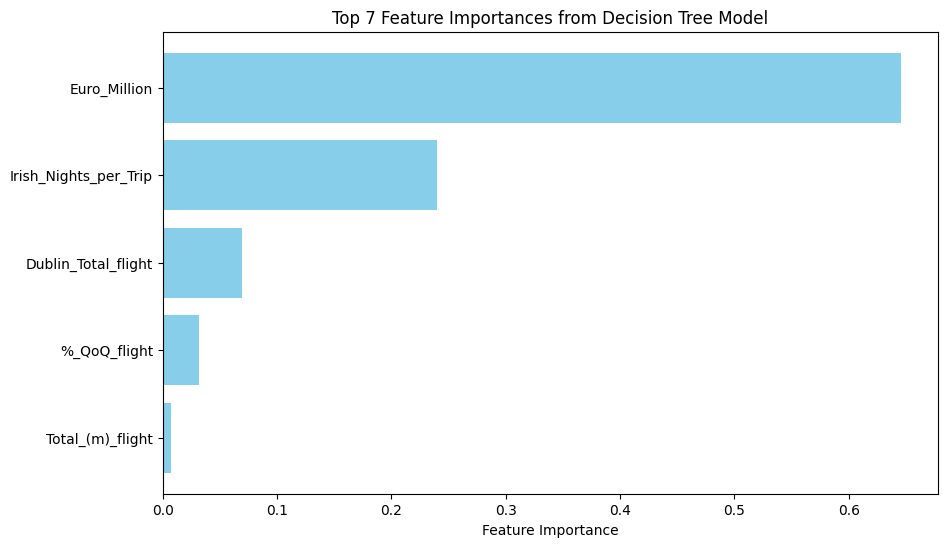

In [715]:
# Access feature importances from the DecisionTreeRegressor
feature_importances = dt_model.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame with feature names
feature_threshold = 5  # Number of top features to display

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance and select the top features
top_features_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(feature_threshold)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 7 Feature Importances from Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [716]:
# Record the start time
import time 
start = time.time()

# Define the parameter grid for DecisionTreeRegressor
grid = {
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__max_depth': list(range(3, 10)),
    'regressor__random_state': [42, 35, 54, 60]
}

# Use GridSearchCV without feature importance, with DecisionTreeRegressor
pipeline = Pipeline([
    ('feature_selection', SelectKBest(k=feature_threshold)),
    ('regressor', DecisionTreeRegressor())
])

# Apply GridSearchCV with the updated grid
CV_dtr_top = GridSearchCV(pipeline, param_grid=grid, cv=5)
CV_dtr_top.fit(X_train, y_train)

# Record the end time and print the execution time
end = time.time()
print("Code Execution Time: ", end - start)

Code Execution Time:  1.0724036693572998


In [717]:
# Extract the best parameters, model, and score from the GridSearchCV results
best_params_top = CV_dtr_top.best_params_
best_model_top = CV_dtr_top.best_estimator_
best_score_top = CV_dtr_top.best_score_

# Fit the best model on the training data
best_model_top.fit(X_train, y_train)

# Display the best parameters and score
best_params_top, best_score_top


({'regressor__max_depth': 3,
  'regressor__max_features': 'sqrt',
  'regressor__random_state': 54},
 -1.817300777256942)

In [718]:
# Predict using the best model from GridSearchCV
y_pred = best_model_top.predict(X_test)
y_train_pred = best_model_top.predict(X_train)

# Print training and test set scores
print("Training set score: {:.2f}".format(best_model_top.score(X_train, y_train)))
print("Test set score: {:.2f}\n".format(best_model_top.score(X_test, y_test)))

# Metrics for training data 
print("Mean Absolute Error (Train):", metrics.mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error (Train):", metrics.mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (Train):", metrics.mean_squared_error(y_train, y_train_pred, squared=False))
print("R² Score (Train):", metrics.r2_score(y_train, y_train_pred), "\n")

# Metrics for test data 
print("Mean Absolute Error (Test):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (Test):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (Test):", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R² Score (Test):", metrics.r2_score(y_test, y_pred))



# Decision Tree model dictionary
dt_metrics_dict = {
    'Model': 'Decision Tree',
    'Training Set Score': dt_model.score(X_train, y_train),
    'Training MAE': metrics.mean_absolute_error(y_train, y_train_pred),
    'Training MSE': metrics.mean_squared_error(y_train, y_train_pred),
    'Training RMSE': metrics.mean_squared_error(y_train, y_train_pred, squared=False),
    'Training R²': metrics.r2_score(y_train, y_train_pred),
    'Test Set Score': dt_model.score(X_test, y_test),
    'Test MAE': metrics.mean_absolute_error(y_test, y_pred),
    'Test MSE': metrics.mean_squared_error(y_test, y_pred),
    'Test RMSE': metrics.mean_squared_error(y_test, y_pred, squared=False),
    'Test R²': metrics.r2_score(y_test, y_pred)
}

Training set score: 0.41
Test set score: -0.55

Mean Absolute Error (Train): 99.01577142857144
Mean Squared Error (Train): 14708.142582857143
Root Mean Squared Error (Train): 121.2771313267969
R² Score (Train): 0.4109530189303737 

Mean Absolute Error (Test): 150.5644897959184
Mean Squared Error (Test): 47258.709731778436
Root Mean Squared Error (Test): 217.3906845561199
R² Score (Test): -0.5492755221814989


In [719]:
from sklearn.model_selection import cross_val_score

# Define the models you want to evaluate, including DecisionTreeRegressor models
models = [
    {"model": dt_model, "name": "Base Decision Tree"},
    {"model": best_model_top, "name": "Hypertuned Decision Tree with Top Features"}
]

# Loop through the models and perform cross-validation
for model in models:
    scores = cross_val_score(model["model"], X, y, cv=10, scoring='r2')
    print("Model: ", model["name"])
    print("R2 Scores: ", scores)
    print("Mean R2 Score: ", scores.mean())
    print("Standard Deviation of R2 Scores: ", scores.std())
    print("\n")

Model:  Base Decision Tree
R2 Scores:  [-0.84352242 -2.19242779  0.38142572 -0.10945283  0.93641984  0.89668341
  0.92882763  0.06606816  0.92272445  0.82373655]
Mean R2 Score:  0.18104827161052545
Standard Deviation of R2 Scores:  0.9708718626504116


Model:  Hypertuned Decision Tree with Top Features
R2 Scores:  [ -0.3588965   -0.16120014  -0.97500702 -41.89264748  -0.4518034
  -0.66409864  -2.90766446  -2.80360473  -3.98516848  -3.80857652]
Mean R2 Score:  -5.800866736469428
Standard Deviation of R2 Scores:  12.111752487407044




In [720]:
# Create a list of dictionaries
metrics_data = [
    lr_metrics_dict,       # Linear Regression
    lasso_metrics_dict,    # Lasso
    ridge_metrics_dict,    # Ridge
    dt_metrics_dict        # Decision Tree
]

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the resulting DataFrame
metrics_df.head()

# Define a dictionary of model names
model_names_dict = {
    0: 'Linear Regression',
    1: 'Lasso',
    2: 'Ridge',
    3: 'Decision Tree'
}

# Use the dictionary to populate the 'Model Name' column
metrics_df.insert(6, 'Model Name', metrics_df.index.map(model_names_dict))

# Display the modified DataFrame
metrics_df.head()

,Model,Training Set Score,Training MAE,Training MSE,Training RMSE,Training R²,Model Name,Test Set Score,Test MAE,Test MSE,Test RMSE,Test R²
0,Linear Regression,0.985969,15.279699,350.343544,18.717466,0.985969,Linear Regression,0.906505,44.032184,2851.953869,53.403688,0.906505
1,Lasso,0.981458,15.279699,350.343544,18.717466,0.985969,Lasso,0.904769,44.032184,2851.953869,53.403688,0.906505
2,Ridge,0.984637,15.279699,350.343544,18.717466,0.985969,Ridge,0.904872,44.032184,2851.953869,53.403688,0.906505
3,Decision Tree,0.997309,99.015771,14708.142583,121.277131,0.410953,Decision Tree,0.271479,150.564490,47258.709732,217.390685,-0.549276
